**Autor:** Dávid Dráb  <br> *[Prírodovedecká fakulta](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), Univerzita Pavla Jozefa Šafárika, Košice 2023* <br> email: [david.drab163@gmail.com](mailto:david.drab163@gmail.com).
***
**<font size=6.5 color=darkgreen> Funkcionálny regresný model I </font>**  

--- 
<a id=obsah></a>

**<font size=5.5 color=darkgreen> Obsah </font>** <br>
1. [<font color=darkgreen> Úvod](#uvod)
    
    
2.  [<font color=darkgreen> Regresia so skalárnou odozvou a funkcionálnymi regresormi](#SnF)
    
    
3.  [<font color=darkgreen> Regresia s funkcionálnou odozvou a skalárnymi regresormi](#FnS)
    
    
4.  [<font color=darkgreen> Regresia s funkcionálnou odozvou a funkcionálnymi regresormi](#FnF)
    
 
5.  [<font color=darkgreen> Zdroje](#References)

--- 
<a id=uvod></a>
**<font size=5 color=darkgreen> 1. Úvod </font>** <br>

**<font size=4 color=darkgreen> 1.1 Funkcionálny regresný model </font>** <br>

Funkcionálne regresné modely môžeme rozdeliť do troch veľkých skupín, v závislosti od toho, či **odozvy** (vysvetľované, závislé premenné) alebo **regresory** (vysvetľujúce, nezávislé premenné) alebo oboje predstavujú **krivky** (funkcie) a tiež predpokladáme, že odozvy a regresory majú nulový priemer.

* Regresia so **skalárnou** odozvou a **funkcionálnymi** regresormi (SnF)

$$ 	Y_i = \int \beta(s) X_i(s) ds + \epsilon_i. $$

* Regresia s **funkcionálnou** odozvou a **skalárnymi** regresormi (FnS)

$$ Y_i(t) = \sum_{k=1}^{p} x_{ik}\beta_k(t) + \epsilon_i(t). $$

* Regresia s **funkcionálnou** odozvou a **funkcionálnymi** regresormi (FnF)

$$ Y_i(t) =  \int \beta(t,s) X_i(s) ds + \epsilon_i(t). $$

Pomocou tohto funkcionálneho modelu, vieme matematicky modelovať rôzne reálne situácie. Jednu z nich si bližšie uvedieme v nasledujúcom príklade. 

V prípade geograficky rozľahlej krajiny (napr. Kanada, Čína), vieme jej meteorologické stanice rozdeliť (napr. pomocou (F)PCA) do 4 geografických kategórií: atlantická, tichomorská, kontinentálna a arktická. Môžme sa pýtať:

*  Môžeme modelovať celkový ročný úhrn zrážok na meteorologickej stanici pomocou jej ročného teplotného profilu (aj na základe jej geografickej kategórie)? (model SnF)


* Je možné modelovať ročné teplotné profily na základe ročných celkových zrážok? (model FnS)


* Môžeme modelovať ročný zrážkový profil meteorologickej stanice pomocou jej ročného teplotného profilu? (model FnF)

Rozdiel medzi klasickým a funkcionálnym regresný modelom si ukážeme na populačnej verzii regresného modelu, t.j. 

$$ 	Y = \sum_{i=1}^{p} \beta_i X_i + \epsilon, $$

pričom $\left[ X_1,X_2,...,X_p,\epsilon\right]$ je náhodný vektor. Hľadáme $\beta$, ktorá minimalizuje 

$$ 	R(\beta) = E \left( Y-\sum_{i=1}^{p} \beta_i X_i \right)^2. $$

Minimum nájdeme pomocou parciálnej derivácie $\partial R(\beta)/\partial \beta_l$, ktorú položíme nule pre každé $l=1,2,...,p$. Pre funkcionálnu verziu modelu potrebujeme nájsť minimum v každom bode funkcie $\beta(t)$, čo je ťažké, pretože tých bodov je nekonečne veľa (sústava nekonečne veľa rovníc je ťažko riešiteľná). Tento problém vieme odstrániť:

* **Bázickým rozvojom funkcie** $\beta(t)$,
t.j. $$\beta(t) = \sum_{k=1}^{K} c_kB_k(t).$$


* **Penalizáciou odhadu funkcie** $\beta(t)$,
kde hľadáme optimálnu hodnotu $\lambda$ penalizovaného reziduálneho súčtu štvorcov

$$ P_{\lambda}(\alpha,\beta) = \sum_{i=1}^{N}\left[Y_i -\alpha -\int z_i(s)\beta(s)ds \right]^2 + \lambda\int\left[ L\beta(s)\right]^2ds,$$ 

kde za diferenciálny operátor berieme druhú deriváciu, t.j. $(L\beta)(t) = \beta''(t).$



* **Odhadom funkcie** $\beta(t)$ **pomocou funkcionálnych hlavných komponentov,**
kde využijeme aproximácie 

$$X_i(t) \approx \hat{\mu}(t) + \sum_{j=1}^{p} \hat{\xi}_{ij}\hat{v}_j(t)\qquad a \qquad \hat{\xi}_{ij} = \int \left[ X_i(t) - \hat{\mu}(t) \right]\hat{v}_j(t)dt.$$ 

Model sa teda redukuje na 
\begin{split}
		Y_i
		& = \alpha + \int\beta(t) \left( \hat{\mu}(t)+\sum_{j=1}^{p}\hat{\xi}_{ij}\hat{v}_j(t)\right) dt +\epsilon_i, \\
		& = \beta_0 +\sum_{j=1}^{p}\hat{\xi}_{ij}\beta_j + \epsilon_i,
	\end{split}
kde
$$ \beta_0 = \alpha + \int \beta(t)\hat{\mu}(t)dt \qquad a \qquad \beta_j = \int \beta(t)\hat{v}_j(t)dt$$

sa považujú za neznáme parametre. Inak povedané, za regresory vezmeme skóre vybraných komponentov. 

Viac detailov nájdeme napr. v 4. a 5. kapitole u Kokoszka a Reimherr (2017).

**<font size=4 color=darkgreen> 1.2 Popis skúmaných dát </font>** <br>

V prostredí programu R nájdeme balík *fda* (Ramsay a kol., 2022), ktorý obsahuje dáta o ročnom priebehu dennej teploty a množstvu zrážok v 35 mestách Kanady. Tieto údaje sú priemernými dennými teplotami a priemerným denným množstvom zrážok medzi rokmi 1960 až 1994.     

In [1]:
options(warnings=-1)
# inicializacia potrebnych balikov
suppressMessages(library("fda", quietly = TRUE, verbose = FALSE))
suppressMessages(library("refund", quietly = TRUE, verbose = FALSE))
suppressMessages(library("heplots", quietly = TRUE, verbose = FALSE))
suppressMessages(library("plot3D", quietly = TRUE, verbose = FALSE))
suppressMessages(library("RVAideMemoire", quietly = TRUE, verbose = FALSE))

Warning message:
"package 'fda' was built under R version 4.1.3"
Warning message:
"package 'refund' was built under R version 4.1.3"
Warning message:
"package 'heplots' was built under R version 4.1.3"
Warning message:
"package 'car' was built under R version 4.1.3"
Warning message:
"package 'carData' was built under R version 4.1.3"
Warning message:
"package 'broom' was built under R version 4.1.3"
Warning message:
"package 'plot3D' was built under R version 4.1.3"
Warning message:
"package 'RVAideMemoire' was built under R version 4.1.3"


In [2]:
# na vyladenie dat pouzijeme fourierovu bazu a 65 funkcii v nej
daybasis65 <- create.fourier.basis(rangeval=c(0, 365), nbasis=65)
linearny_diff_operator <- vec2Lfd(c(0,(2*pi/365)^2,0), c(0, 365))

# pracujeme s datami, ktore maju nulove priemery!! 
daytempfd <- smooth.basis(day.5, CanadianWeather$dailyAv[,,"Temperature.C"]
                          -rowMeans(CanadianWeather$dailyAv[,,"Temperature.C"]),
                          daybasis65, fdnames=list("deň", "stanica", "stupeň Celzia"))$fd
dayprecfd <- smooth.basis(day.5, CanadianWeather$dailyAv[,,"log10precip"]
                          -rowMeans(CanadianWeather$dailyAv[,,"log10precip"]),
                          daybasis65, fdnames=list("deň", "stanica", "zrážky v log10(mm)"))$fd

V nasledujúcich dvoch grafoch si vykreslíme už vyhladené teplotné krivky a logaritmické zrážkové profily.  Podľa Ramsaya a kol. (2009) sme použili **65 funkcií v báze** a vzhľadom na existenciu periódy sme využili **fourierovu bázu**.  

[1] "done"

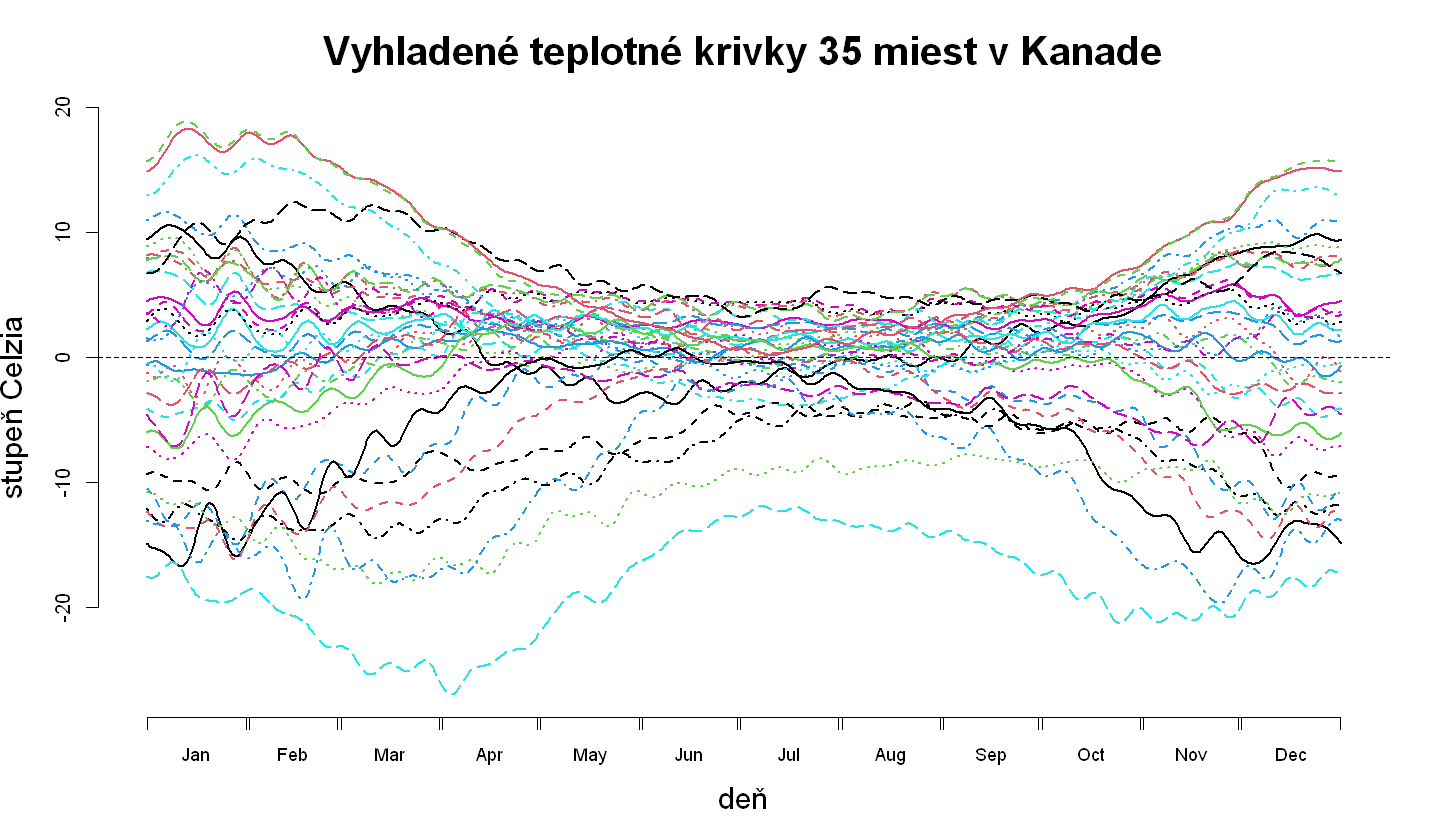

In [3]:
options(repr.plot.width=12, repr.plot.height=7)
plot(daytempfd, axes=FALSE, 
        cex.lab=1.5,lwd=2, main="Vyhladené teplotné krivky 35 miest v Kanade", cex.main=2)
axisIntervals(1)
axis(2)

[1] "done"

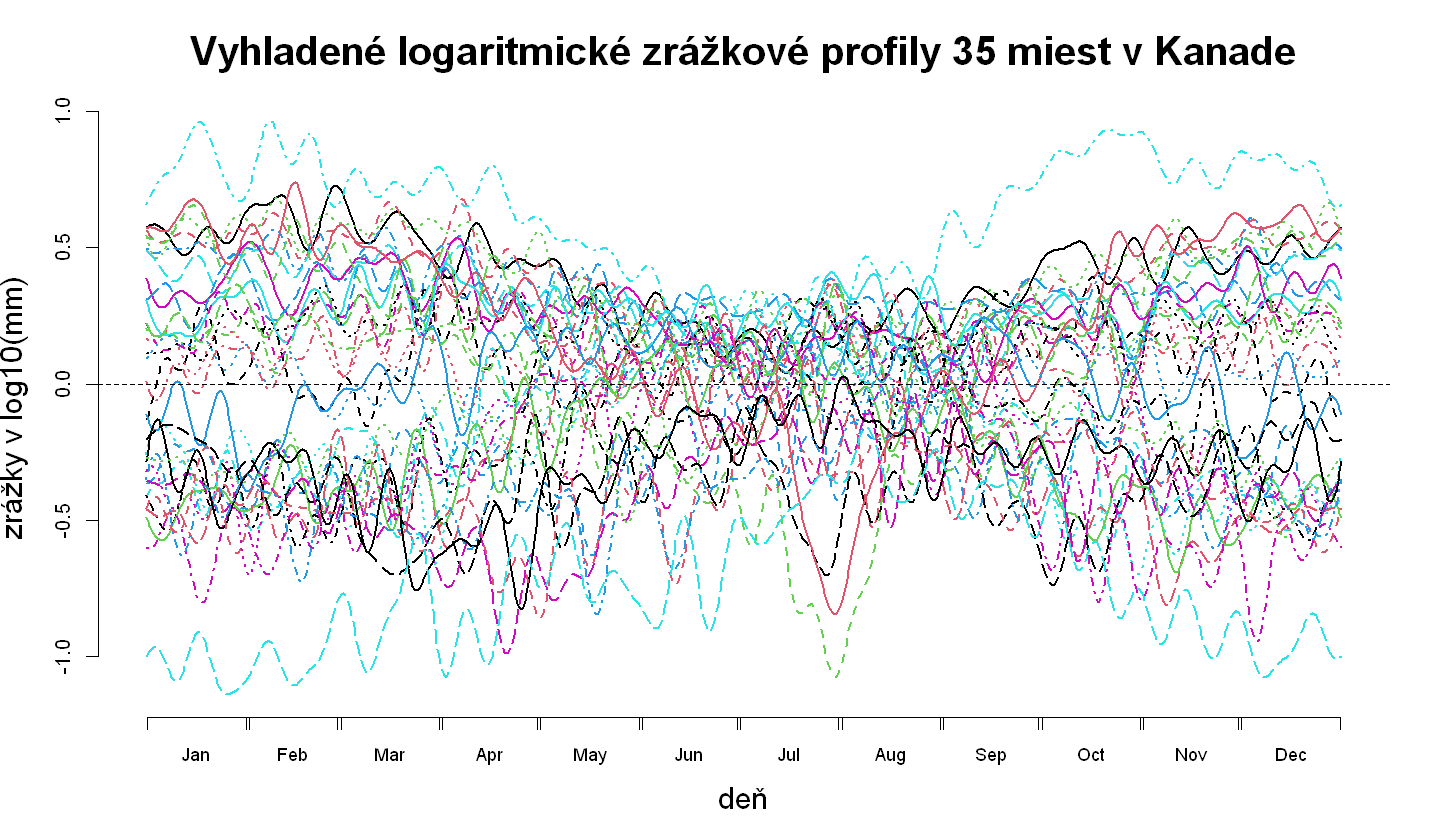

In [4]:
plot(dayprecfd, axes=FALSE, cex.lab=1.5, lwd=2, 
        main="Vyhladené logaritmické zrážkové profily 35 miest v Kanade", cex.main=2)
axisIntervals(1)
axis(2)

**<font size=4 color=darkgreen> 1.3 FCPA </font>** <br>

V regresných modeloch môžeme používať aj skóre komponentov FCPA (alebo interpretácie výsledkov FPCA). Ukážeme si aj inú implementáciu tejto metódy a to pomocou funkcie `pca.fd()` z balíka *fda*. Výhodou tejto implementácie je pomerne jednoduché vykreslenie potrebných grafov na interpretáciu jednotlivých komponentov.

In [5]:
# vytvorime si objekty funkcionalnych parametrov s danou bazou, diff. operatorom a lambdou
harmfdPar     <- fdPar(daybasis65, linearny_diff_operator, 1e6)
# na vykonanie metody fpca vyuzijeme tuto implementaciu, kde vstupom su data, 
# pocet prvych komponentov, ktore sa maju vykreslit (neskor) a funcionalne parametre
daytemppcaobj <- pca.fd(daytempfd,nharm=4, harmfdPar)

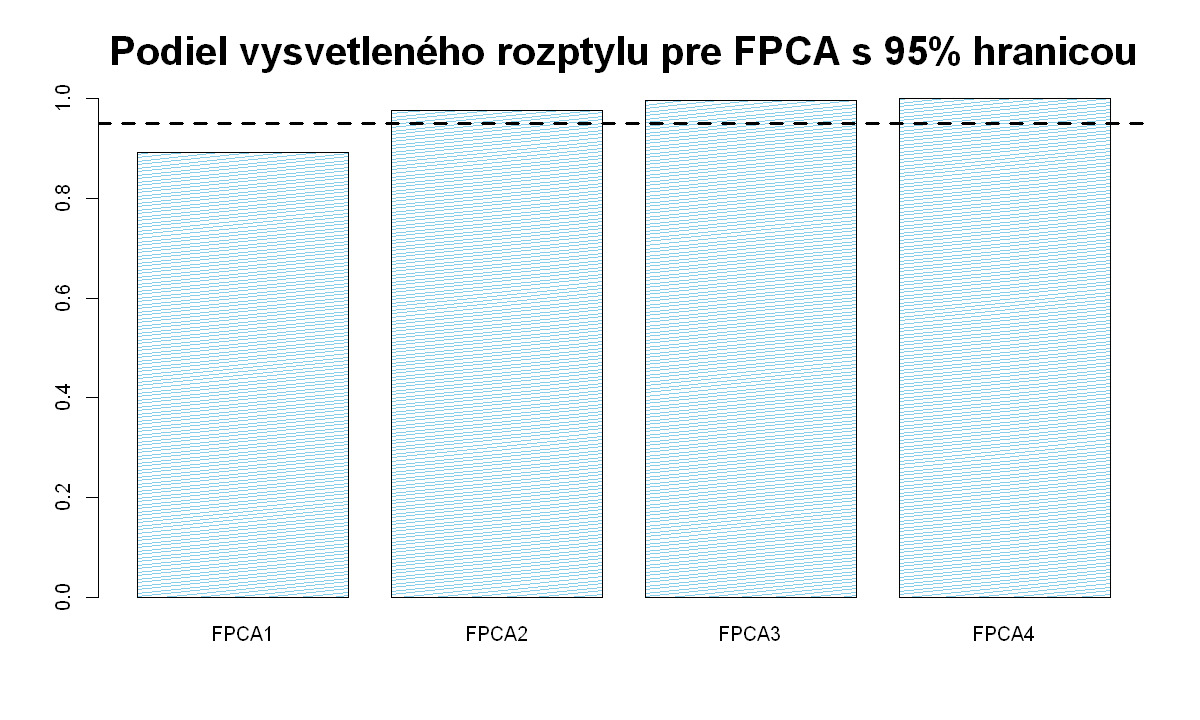

In [6]:
options(repr.plot.width=10, repr.plot.height=6)
pve.face <- (cumsum(daytemppcaobj$varprop)/sum(daytemppcaobj$varprop))
barplot(pve.face, ylim=c(0,1), col="skyblue", main="Podiel vysvetleného rozptylu pre FPCA s 95% hranicou", cex.main=2, 
        names.arg = c("FPCA1","FPCA2","FPCA3","FPCA4"),density=c(30,30,30,30) , angle=c(11,11,11,11) )
abline(0.95,0, lwd=3, lty=2)

Pri striktnom dodržaní 95% vysvetlenia rozptylu pôvodných dát, vyberieme len 2 hlavné komponenty.

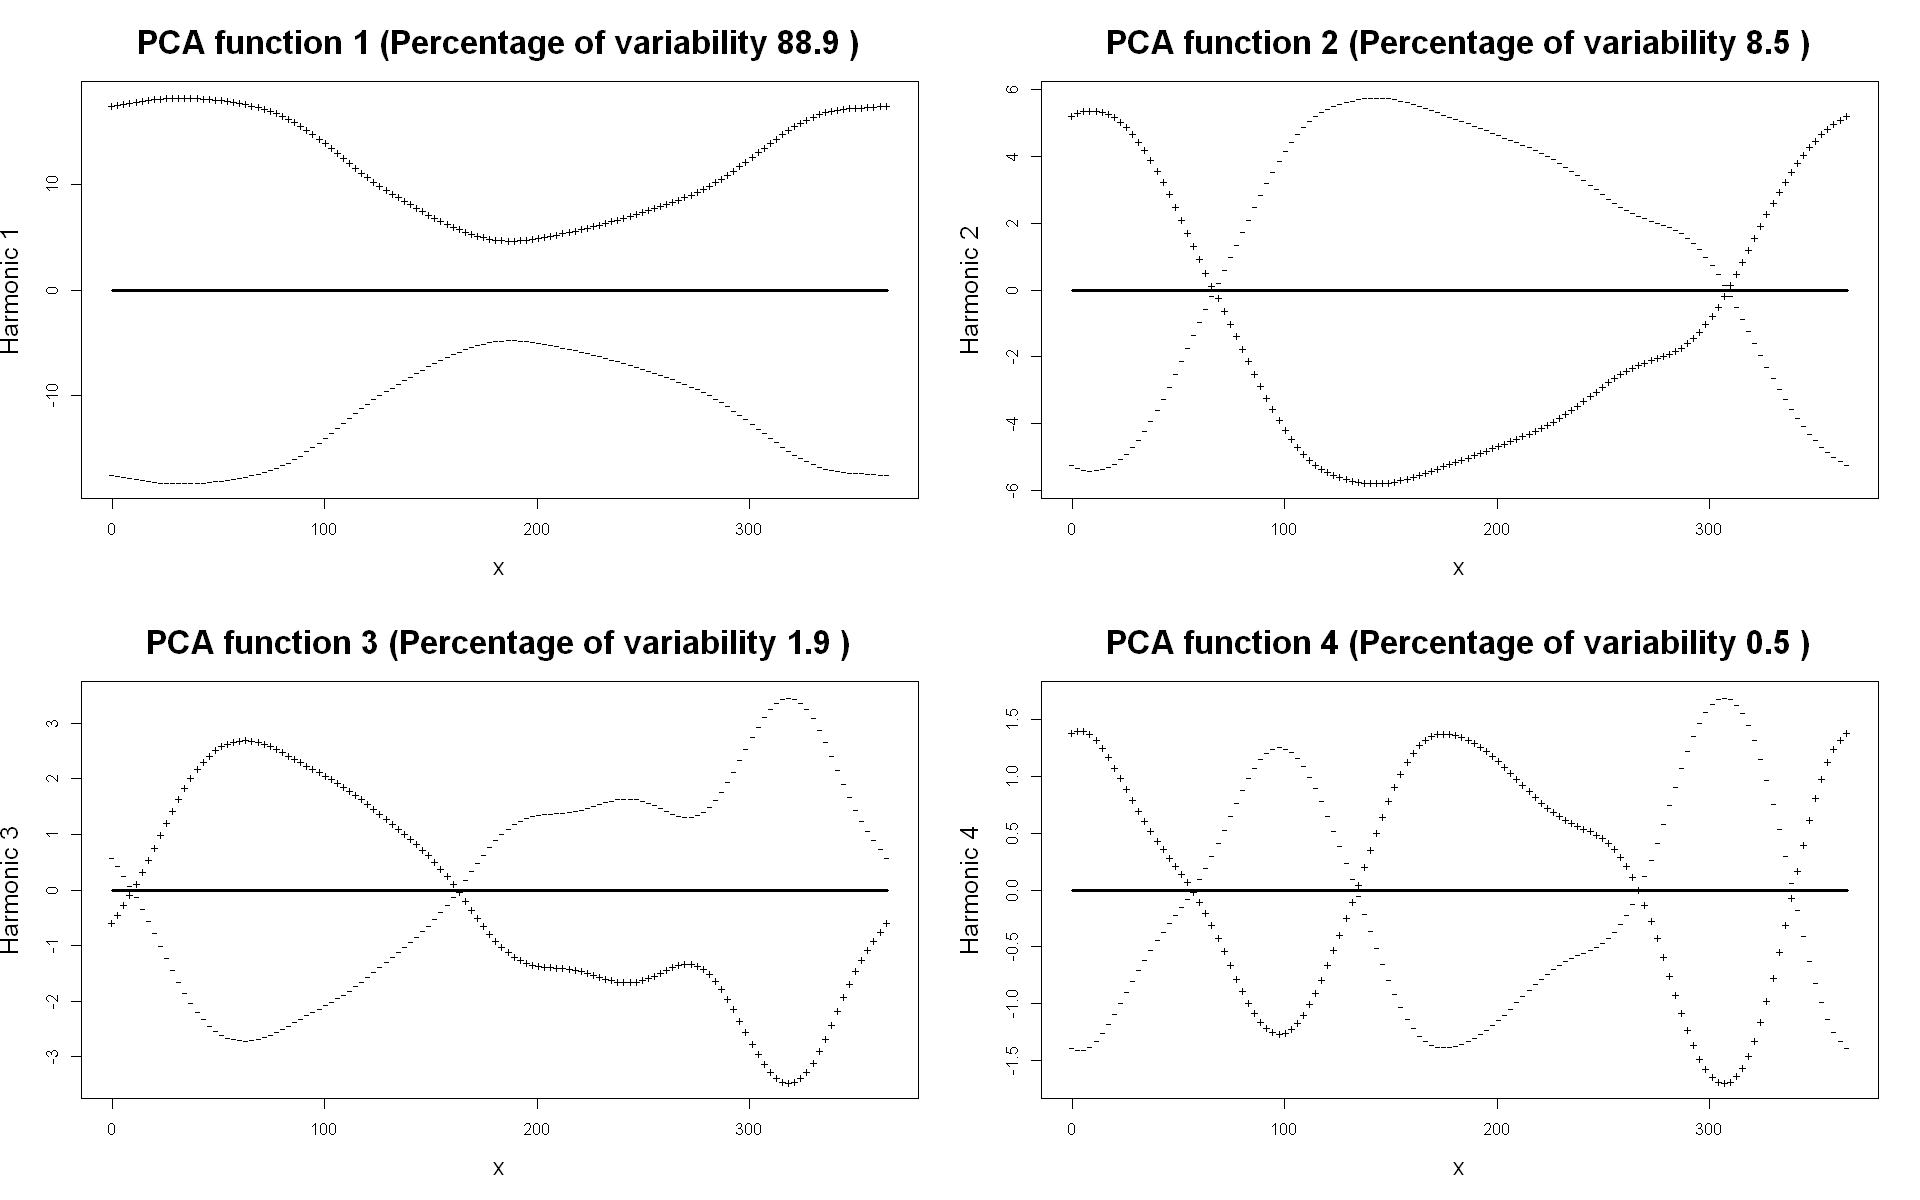

In [7]:
options(repr.plot.width=16, repr.plot.height=10)
par(mfrow=c(2,2), pty="m")
# vykreslime si aj grafy ucinkov komponentov na krivku priemeru s percentom vysvetleneho rozptylu
plot.pca.fd(daytemppcaobj, cex.main=2, cex.lab=1.5, lwd=3)

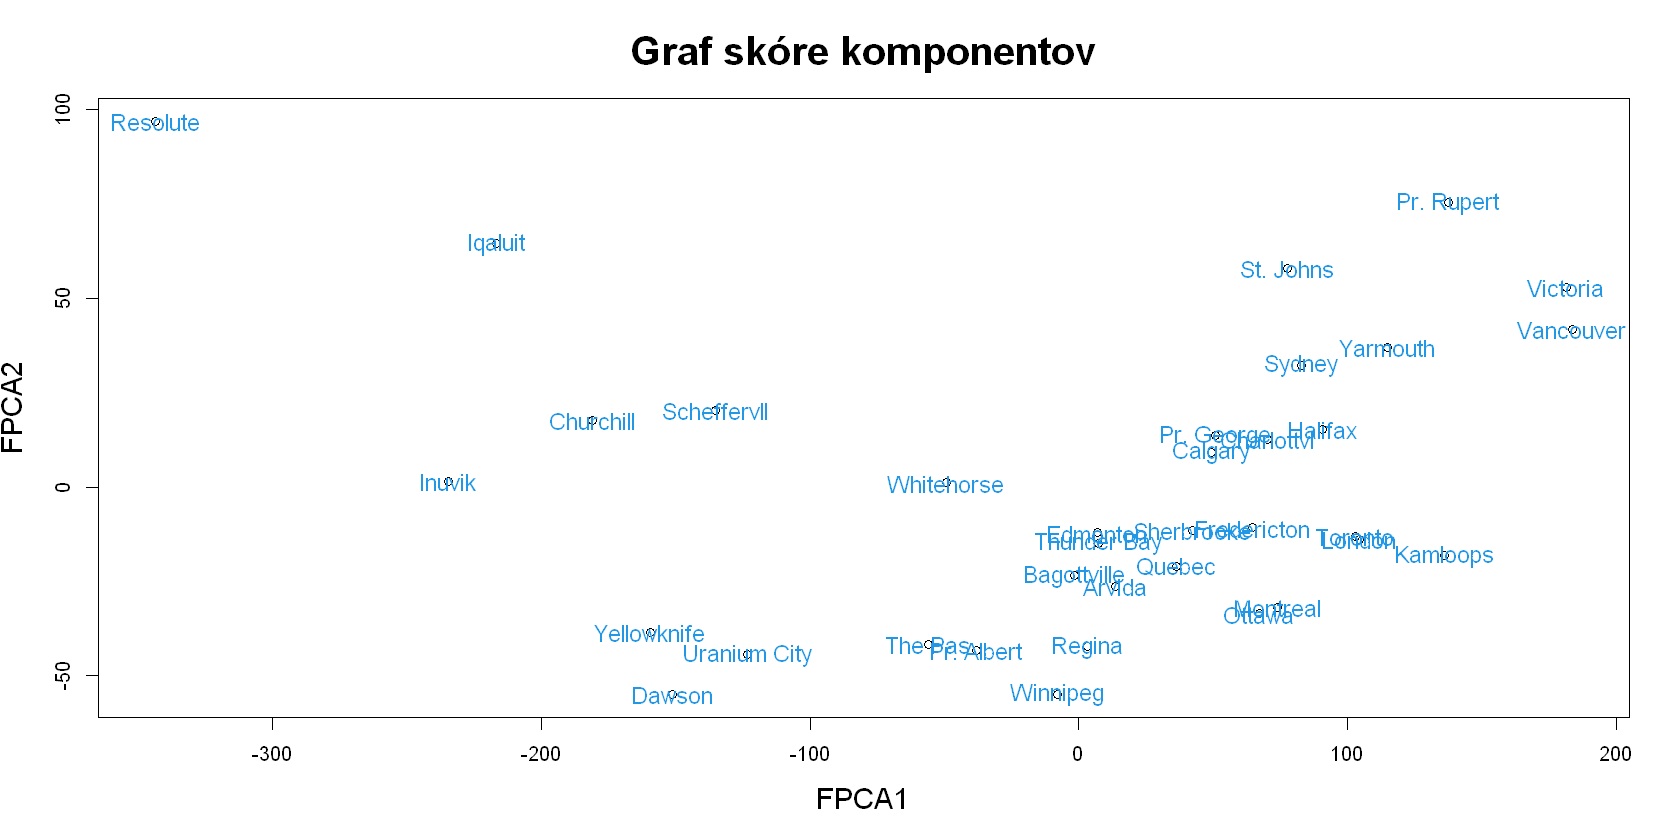

In [8]:
harmscr <- daytemppcaobj[[3]]
options(repr.plot.width=14, repr.plot.height=7)
plot(harmscr[,1], harmscr[,2], xlab="FPCA1", ylab="FPCA2", cex.lab=1.45, main="Graf skóre komponentov", cex.main=2)
text(harmscr[,1], harmscr[,2], CanadianWeather$place, col=4, cex=1.15)

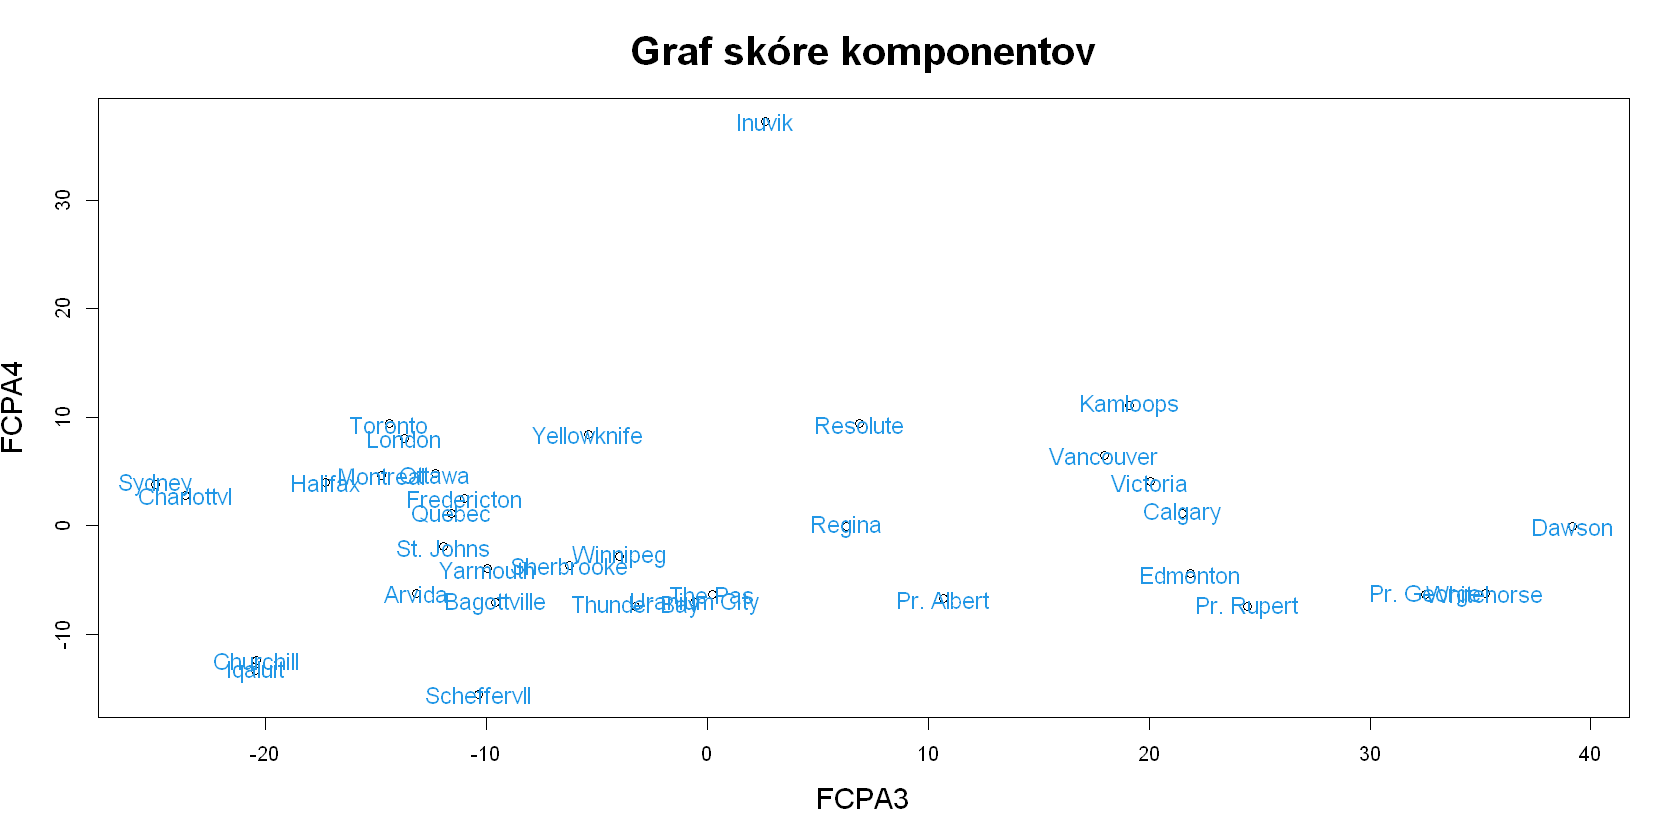

In [9]:
plot(harmscr[,3], harmscr[,4], xlab="FCPA3", ylab="FCPA4", cex.lab=1.45,main="Graf skóre komponentov", cex.main=2)
text(harmscr[,3], harmscr[,4], CanadianWeather$place, col=4, cex=1.15)

Grafy účinku jednotlivých vlastných funkcií na krivku priemeru aj grafy skóre komponentov nám dávajú pomerne neužitočné informácie. Podľa Ramsaya a kol. (2005) je vhodné použitie **rotácie vlastných vektorov**. Optimálnu rotáciu nájdeme pomocou metódy **varimax**, výsledkom ktorej je zvýraznenie malého počtu dôležitých premenných, čo uľahčuje interpretáciu výsledkov.

**<font size=4 color=darkgreen> 1.4 FCPA - varimax </font>** <br>

Túto metódu vieme pomerne jednoducho použiť. V balíku *fda* (Ramsay a kol., 2022) máme opäť vhodnú implementáciu pomocou funkcie `varmx.pca.fd()`, kde vstupným parametrom je objekt triedy `pca.fd`, ktorý je výstupom funkcie `pca.fd()`.

In [10]:
# vstupom metody bude vystup metody pca.fd()
daytemppcaobjVM <- varmx.pca.fd(daytemppcaobj)
dimnames(daytemppcaobjVM$scores)[[2]] <- paste("PCA", 1:4, sep=".")

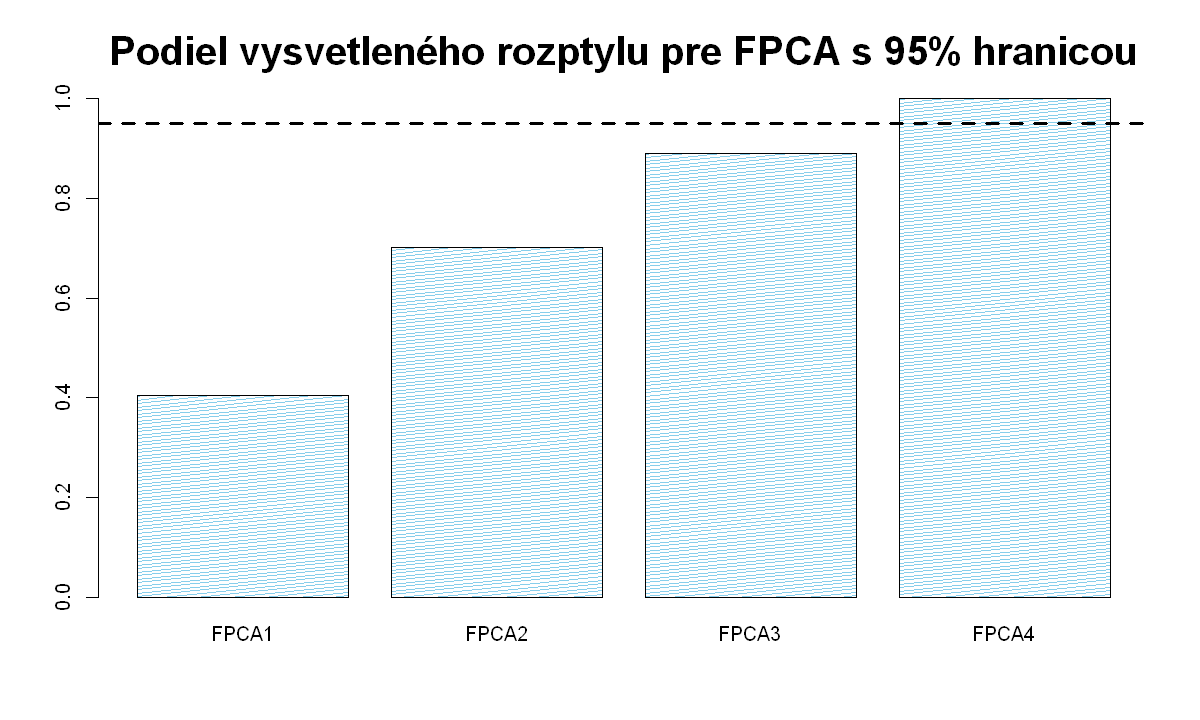

In [11]:
pve.face <- (cumsum(daytemppcaobjVM$varprop)/sum(daytemppcaobjVM$varprop))
options(repr.plot.width=10, repr.plot.height=6)
barplot(pve.face, ylim=c(0,1), col="skyblue", main="Podiel vysvetleného rozptylu pre FPCA s 95% hranicou", cex.main=2, 
        names.arg = c("FPCA1","FPCA2","FPCA3","FPCA4"),density=c(30,30,30,30) , angle=c(11,11,11,11) )
abline(0.95,0, lwd=3, lty=2)

Po rotácií faktorov dostaneme až 4 hlavné komponenty, ktoré vysvetlia viac, ako 95% rozptylu pôvodných dát. 

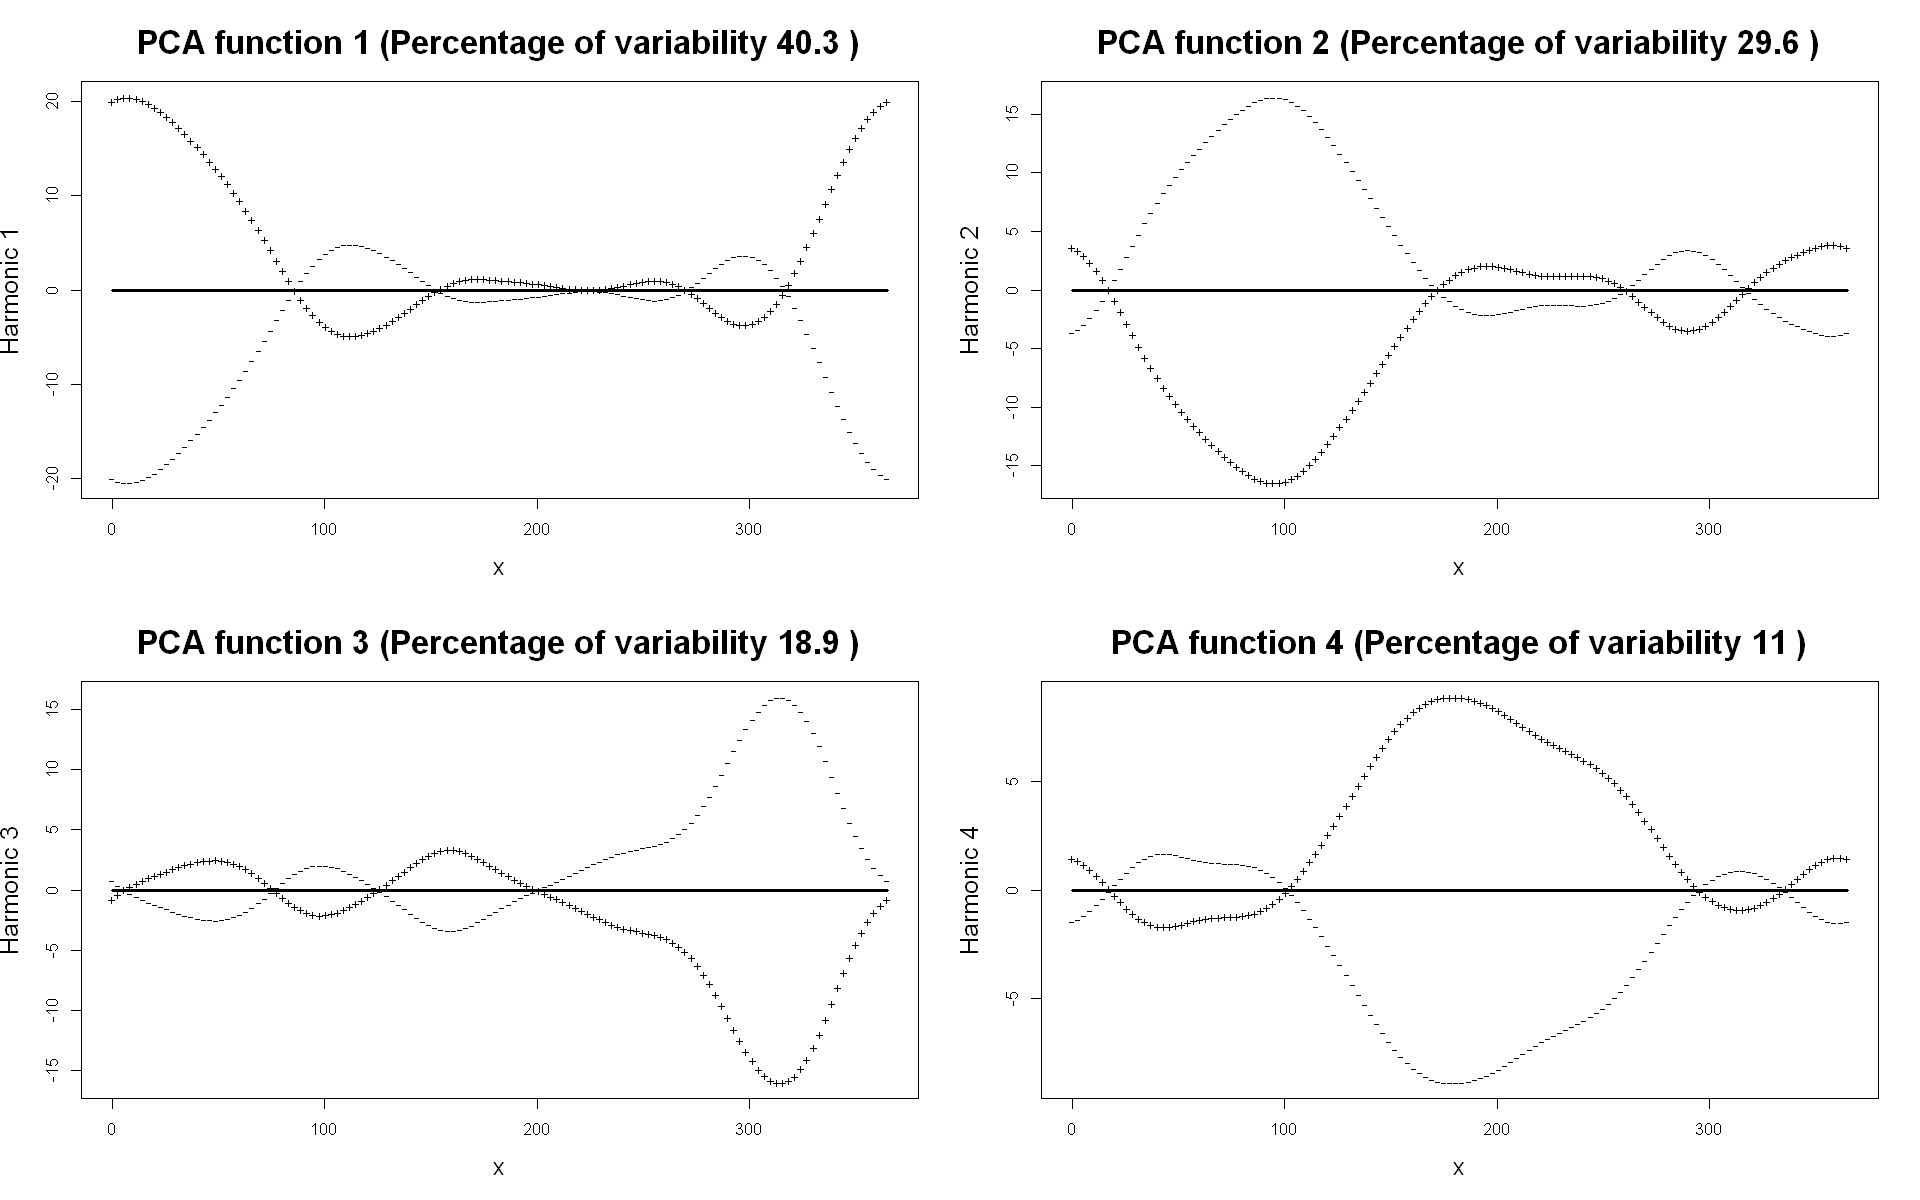

In [12]:
options(repr.plot.width=16, repr.plot.height=10)
par(mfrow=c(2,2), pty="m")
# vykreslime si aj grafy ucinkov komponentov na krivku priemeru s percentom vysvetleneho rozptylu
plot.pca.fd(daytemppcaobjVM, cex.main=2, cex.lab=1.5, lwd=3)

Grafy účinku jednotlivých vlastných funkcií na krivku priemeru nám už poskytujú rozumnejšiu interpretáciu. Prvý komponent môže popisovať rozdiely teplôt počas **zimy**, druhý komponent rozdiely teplôt v **jarnom období**, tretí komponent rozdiely teplôt počas **jesene** a štvrtý komponent rozdiely teplôt v **letnom období**. Aj nasledujúce grafy skóre komponentov nám túto interpretáciu potvrdia.

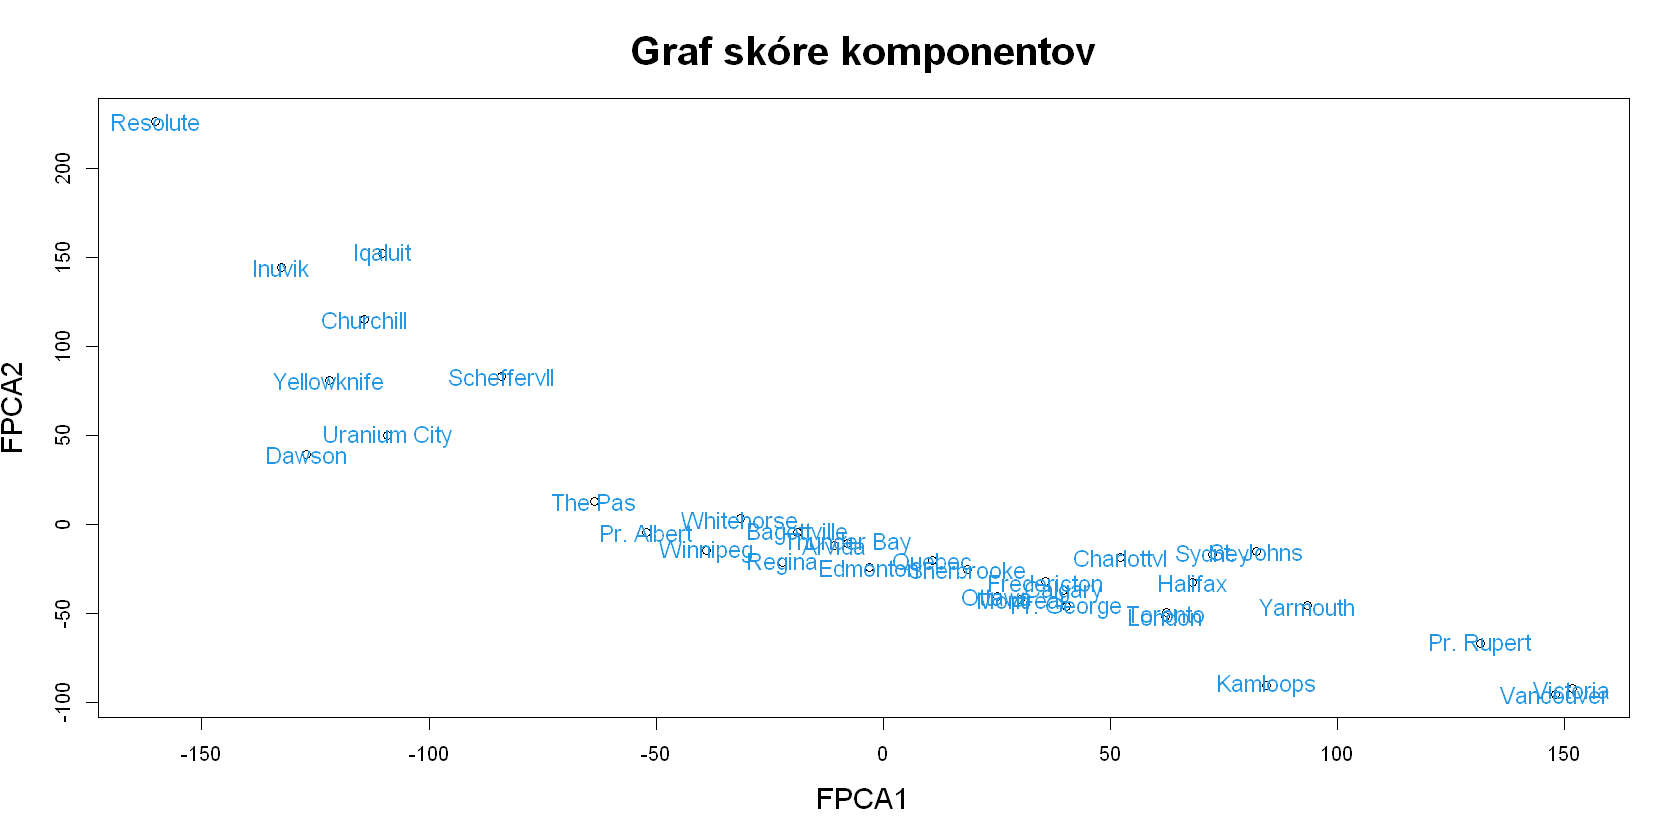

In [13]:
harmscr <- daytemppcaobjVM[[3]]
options(repr.plot.width=14, repr.plot.height=7)
plot(harmscr[,1], harmscr[,2], xlab="FPCA1", ylab="FPCA2", cex.lab=1.45,main="Graf skóre komponentov", cex.main=2)
text(harmscr[,1], harmscr[,2], CanadianWeather$place, col=4, cex=1.15)

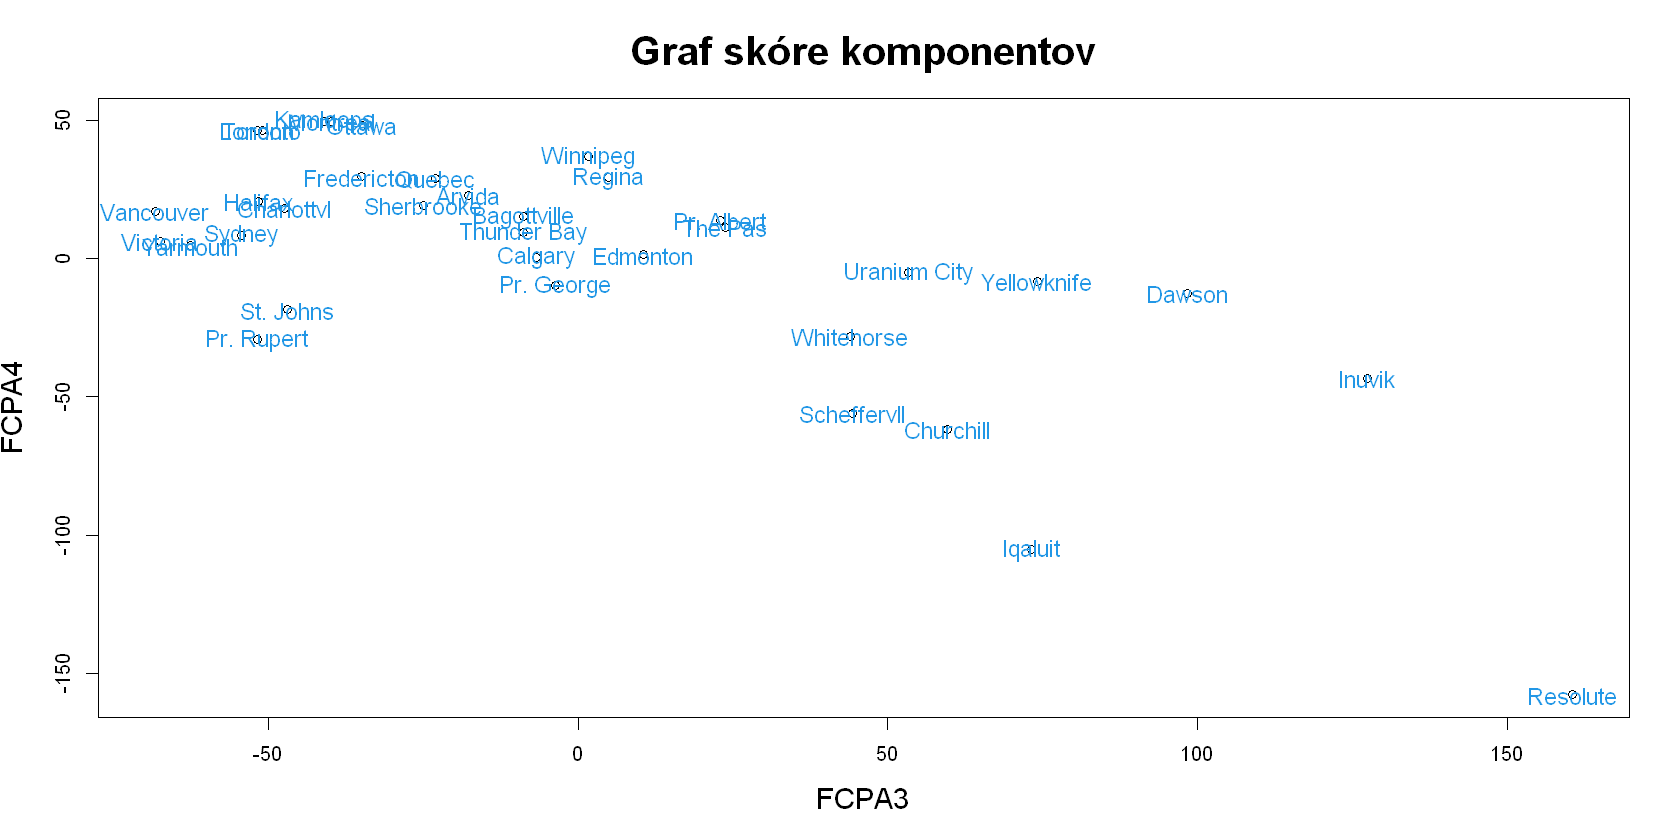

In [14]:
plot(harmscr[,3], harmscr[,4], xlab="FCPA3", ylab="FCPA4", cex.lab=1.45,main="Graf skóre komponentov", cex.main=2)
text(harmscr[,3], harmscr[,4], CanadianWeather$place, col=4, cex=1.15)



V nasledujúcich častiach si ukážeme jednotlivé typy funkcionálneho regresného modelu aplikované na dáta o počasí v Kanadských mestách. Pri ich implementácii sme sa inšpirovali ilustračnou [implementáciou](https://rdrr.io/cran/fda/src/demo/canadian-weather.R?fbclid=IwAR2VxoNaHo0PWAwCqzFqgyLItzPHXFW_5QnC_QKRdAETB4jAhalv_hDWoiI) z roku 2008, ktorá je súčasťou balíka *fda* (Ramsay a kol., 2022). Obsahuje však mnohé chyby, ktoré sme následne opravili. Pri využití druhej (jednoduchšej) implementácie sme sa inšpirovali online kurzom Staicu a Parka (2016).

--- 
<a id=SnF></a>
**<font size=5 color=darkgreen> 2. Regresia so skalárnou odozvou a funkcionálnymi regresormi </font>** <br>

Regresia so **skalárnou** odozvou a **funkcionálnymi** regresormi (SnF) má tvar

$$ 	Y_i = \displaystyle \int \beta(s) X_i(s) ds + \epsilon_i. $$

Tento model popisuje celkové zrážky jednotlivých staníc za rok (v logaritmickej škále) na základe ich teplotných profilov. Celkové zrážky sú závislou premennou a teplotné profily nezávislou premennou. 

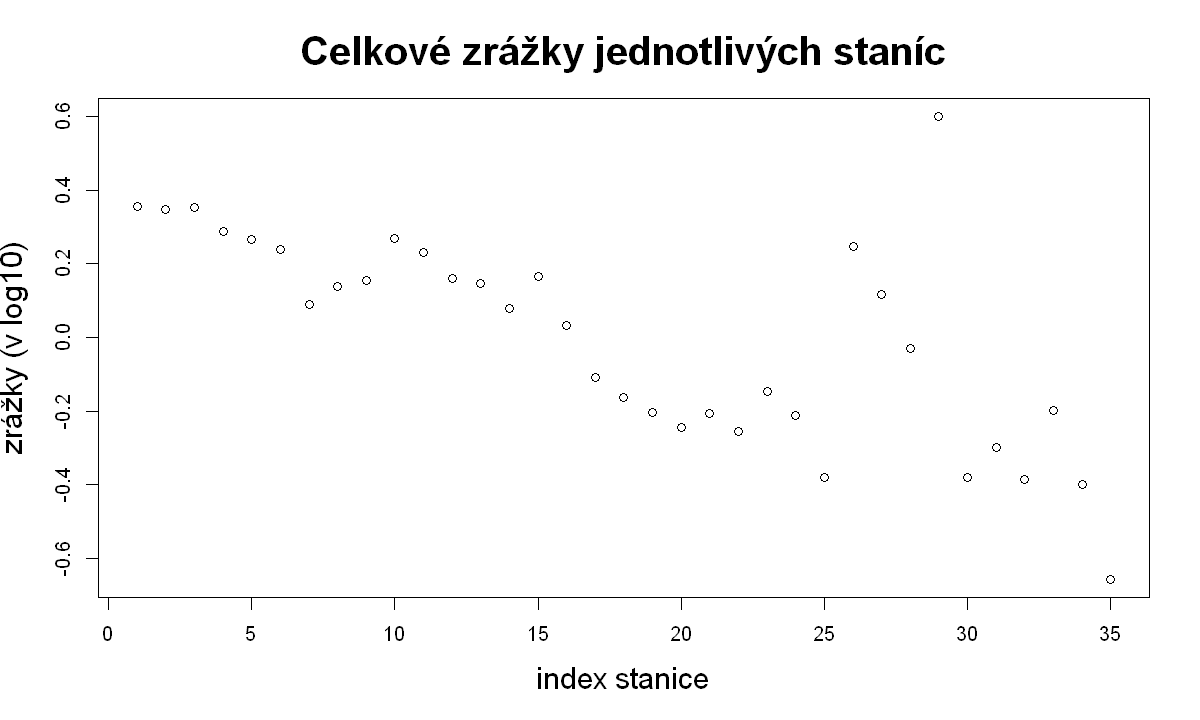

In [15]:
# zlogaritmujeme si a zratame sucet zrazok za rok
celkove_zrazky <- (log10(apply(CanadianWeather$dailyAv[,,"Precipitation.mm"],
                               2,sum))-mean(log10(apply(CanadianWeather$dailyAv[,,"Precipitation.mm"],2,sum))))
options(repr.plot.width=10, repr.plot.height=6)
plot(celkove_zrazky, type="p", xlab="index stanice", ylab="zrážky (v log10)", main="Celkové zrážky jednotlivých staníc", 
     cex.lab=1.5, cex.main=2)

**<font size=4 color=darkgreen> 2.1 Odhad pomocou bázického rozvoja funkcie $\beta$ </font>** <br>

Najjednoduchším spôsobom odhadu beta funkcie je pomocou jej bázického rozvoja, t.j. $$\beta(t) = \sum_{k=1}^{K} c_kB_k(t).$$ 
Potom jej odhadom bude $$\hat{\beta}(t) = \sum_{k=1}^{K} \hat{c}_kB_k(t).$$ 

V tomto príklade použijeme malý počet funkcií v báze, konkrétne len 15. Využijeme funkciu `fRegress()` z balíka *fda* (Ramsay a kol., 2022).

In [16]:
# vytvorime si konstantnu bazu pre konstantu a fourierovu bazu pre beta funkciu s 15 funkciami v baze, 
# obe bazy su definovane na intervale 0 az 365 
kon_baza<-create.constant.basis(c(0,365))
beta_baza<-create.fourier.basis(c(0,365),15)
# bazy si ulozime ako listy do vektora betalist
betalist2<-vector("list",2)
betalist2[[1]]<-kon_baza
betalist2[[2]]<-beta_baza
# data si ulozime do vektora templist2 ako listy
templist2<-vector("list",2)
templist2[[1]]<-rep(1,35)
templist2[[2]]<-daytempfd

In [17]:
# vykoname samotnu regresiu pomocou funkcie fRegress()
fRegressList<-fRegress(celkove_zrazky,templist2,betalist2)

[1] "done"

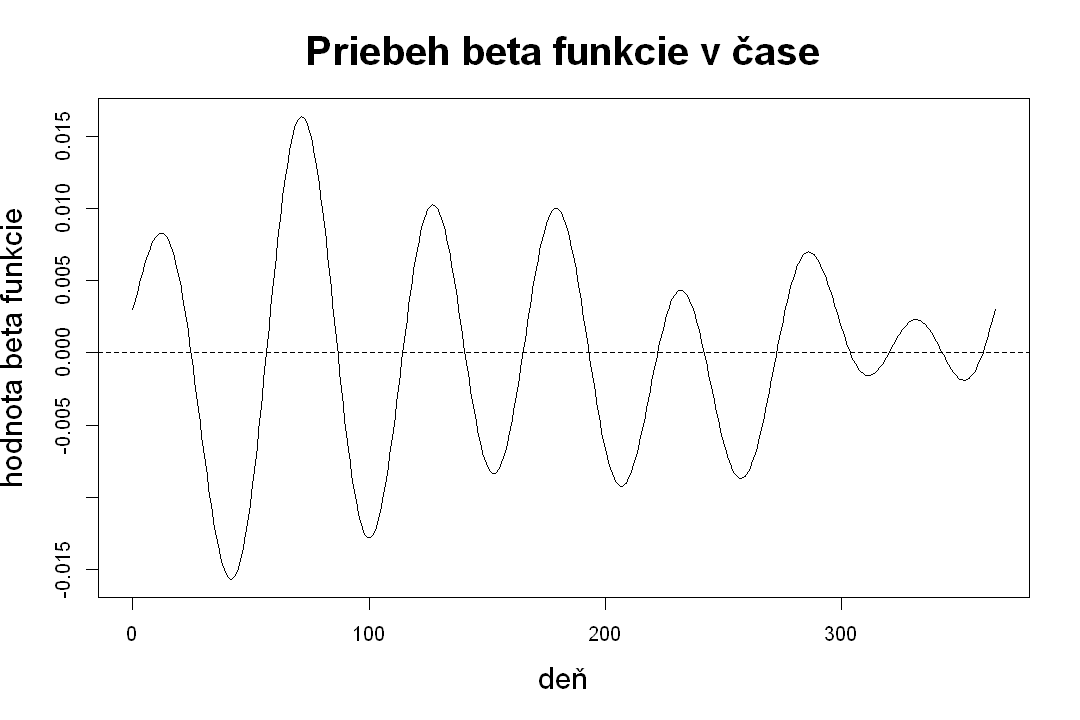

In [18]:
# vykreslime si priebeh beta funkcie
betaestlist<-fRegressList$betaestlist
tempbetafd<-betaestlist[[2]]$fd
options(repr.plot.width=9, repr.plot.height=6)
plot(tempbetafd, xlab="deň",
ylab="hodnota beta funkcie", main="Priebeh beta funkcie v čase", cex.main=2, cex.lab=1.5)

Vidíme, že hodnota konštantnej funkcie je **takmer nulová** a hodnoty beta funkcie časom kolíšu, avšak pomerne **blízko nulovej hodnoty**. 

In [19]:
# vyratame si rezidua a koeficient determinacie
celkove_zrazky_odhad = fRegressList$yhatfdobj
rezidua = celkove_zrazky - celkove_zrazky_odhad
SSE1 = sum(rezidua^2)
SSE0 = sum((celkove_zrazky - mean(celkove_zrazky))^2)
RSQ1= (SSE0-SSE1)/SSE0
RSQ1

[1] 0.9153581

**Koeficient determinácie**, ktorý meria kvalitu modelu udáva hodnotu **91,53%**, čo hovorí o percentuálnom vysvetlení rozptylu závislej premennej (celkových log. zrážok jednotlivých staníc) modelom. 

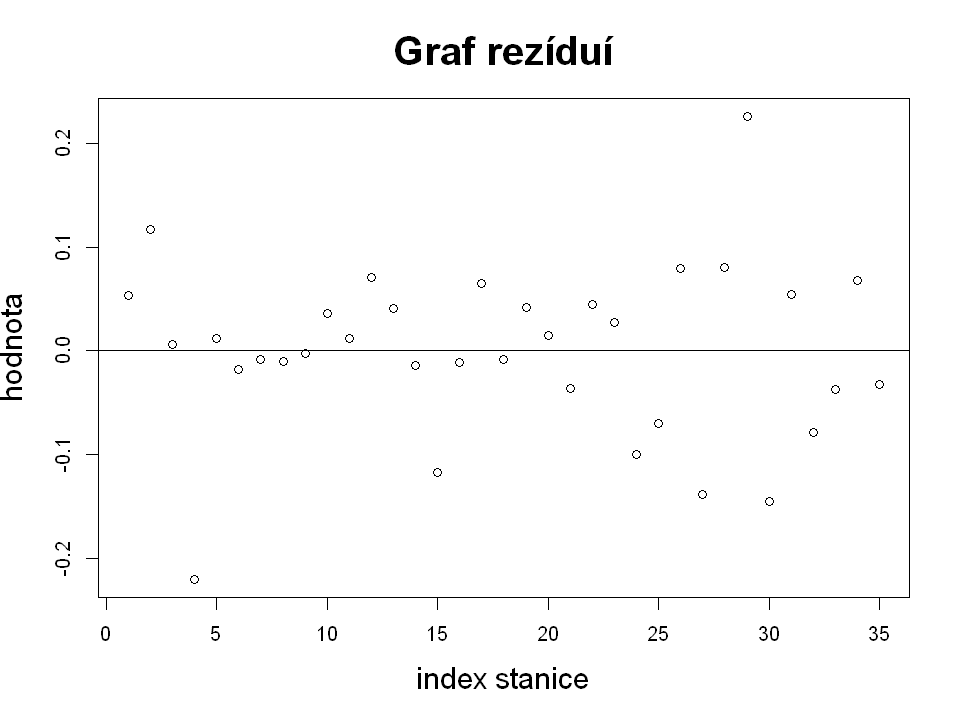

In [20]:
options(repr.plot.width=8, repr.plot.height=6)
plot(rezidua, type="p", main="Graf rezíduí", xlab="index stanice", ylab="hodnota", cex.main=2, cex.lab=1.5)
abline(0,0)

Vzhľadom na to, že naše odhadované hodnoty sú skaláry (jedno číslo), nevieme kvalitu modelu overiť pomocou klasickej analýzy rezíduí (ako časový rad). Môžeme nanajvýš vykresliť rozdiel medzi nameranou a odhadovanou hodnotou. 

**<font size=4 color=darkgreen> 2.2 Odhad pomocou penalizácie funkcie $\beta$ </font>** <br>

V prípade, že odhad nie je príliš vyhladený, môžeme vykonať **penalizáciu odhadu funkcie** $\beta(t)$, kde hľadáme optimálnu hodnotu $\lambda$ penalizovaného reziduálneho súčtu štvorcov

$$ P_{\lambda}(\alpha,\beta) = \sum_{i=1}^{N}\left[Y_i -\alpha -\int z_i(s)\beta(s)ds \right]^2 + \lambda\int\left[ L\beta(s)\right]^2ds.$$ 

Opäť využijeme funkciu `fRegress()` z balíka *fda* (Ramsay a kol., 2022). Aj tentoraz budú vstupom funkcionáne objekty. 

In [21]:
p <- 2
# jednoriadkova "bazicka" matica 1tiek 
konstanta_fd <- fd(matrix(1,1,35), create.constant.basis(c(0, 365)))

# ulozenie regresorov do vektora ako listy
regresory_fd_list <- vector("list",2)
regresory_fd_list[[1]] <- konstanta_fd
regresory_fd_list[[2]] <- daytempfd[1:35]

Použijeme **penalizované vyhladenie** s hodnotami parametra $\lambda = 10$ a s 35 funkciami v báze, ktoré navrhuje Ramsay a kol. (2009). 

In [22]:
#koeficienty regresorov su opat ulozime ako "funkcionalne listy" funkcii s danymi parametrami
koeficienty_list <- vector("list",2)

# vytvorenie konstantnej regresnej funkcie
beta_baza1 <- create.constant.basis(c(0, 365))
betafd1    <- fd(0, beta_baza1)
betafdPar1 <- fdPar(betafd1)
koeficienty_list[[1]] <- betafdPar1

#  vytvorenie beta regresnej funckie 
beta_pocet_baz  <- 35
beta_baza2  <- create.fourier.basis(c(0, 365), beta_pocet_baz)
betafd2     <- fd(matrix(0,beta_pocet_baz,1), beta_baza2)
lambda      <- 10
betafdPar2  <- fdPar(betafd2, linearny_diff_operator, lambda)
koeficienty_list[[2]] <- betafdPar2

In [23]:
# vykoname samotnu regresiu 
SnF <- fRegress(celkove_zrazky, regresory_fd_list, koeficienty_list)

[1] "done"

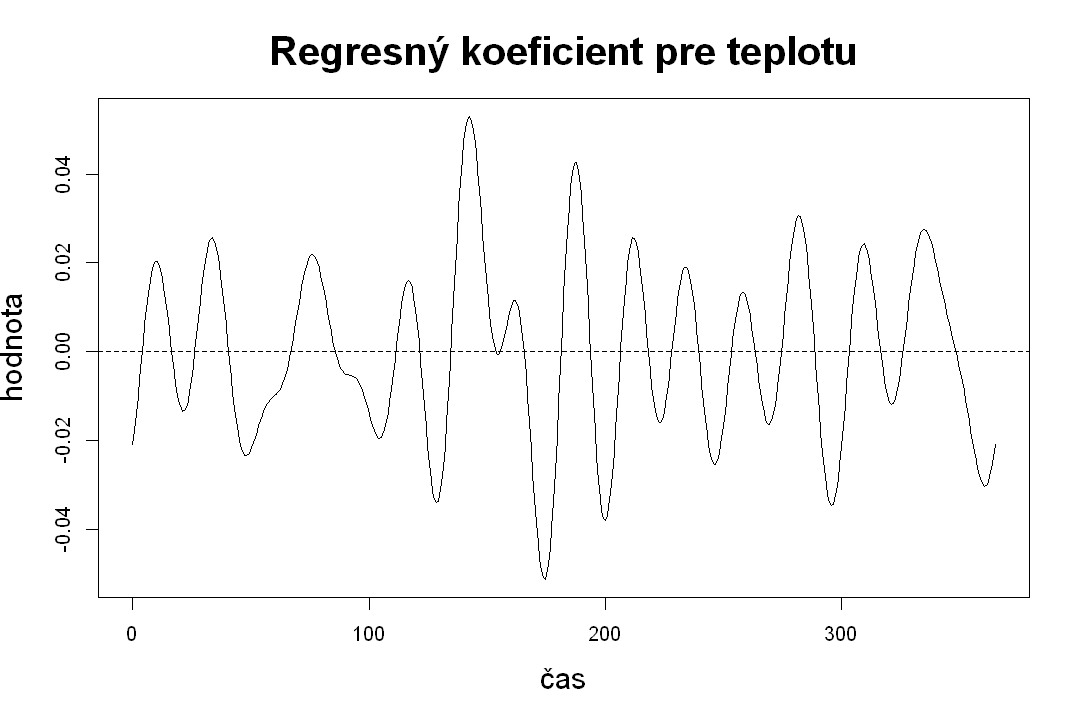

In [24]:
# vykreslime si priebeh beta regresnej funkcie 
beta_list_odhad   <- SnF$betaestlist
celkove_zrazky_odhad <- SnF$yhatfdobj
betafdPar <- beta_list_odhad[[2]]
betafd    <- betafdPar$fd
par(mfrow=c(1,1), pty="m")
options(repr.plot.width=9, repr.plot.height=6)
plot(betafd,main="Regresný koeficient pre teplotu", cex.main=2, cex.lab=1.5, xlab="čas", ylab="hodnota")

Hodnoty **beta funkcie** opäť kolíšu okolo **nuly**.

In [25]:
# vyratame si rezidua a koeficient determinacie modelu
celkove_zrazky_odhad = SnF$yhatfdobj
rezidua2 = celkove_zrazky - celkove_zrazky_odhad
SSE2 = sum(rezidua2^2)
SSE02 = sum((celkove_zrazky - mean(celkove_zrazky))^2)
RSQ2= (SSE02-SSE2)/SSE02
RSQ2

[1] 0.9999984

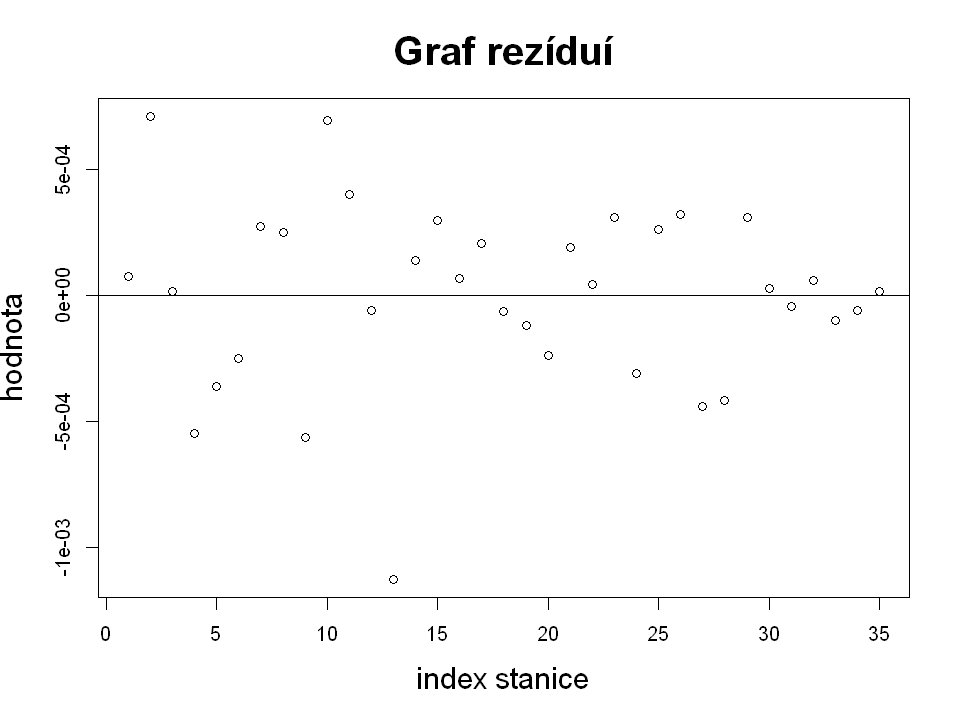

In [26]:
options(repr.plot.width=8, repr.plot.height=6)
plot(rezidua2, type="p", main="Graf rezíduí", xlab="index stanice", ylab="hodnota", cex.main=2, cex.lab=1.5)
abline(0,0)

**Koeficient determinácie** modelu udáva hodnotu **takmer 100%**. Opäť sú naše odhadované hodnoty sú skaláry (jedno číslo), nevieme kvalitu modelu overiť pomocou klasickej analýzy rezíduí (ako časový rad).

**<font size=4 color=darkgreen> Výber optimálneho parametra $\lambda$ </font>** <br>

Pri výbere hodnoty parametra penalizácie by nás mohlo zaujímať, akým spôsobom vybrať tu optimálnu. Môžeme použiť už známu metódu **krížovej validácie** (angl. *cross-validation*), resp. jej **zovšeobecnenú** verziu (*GCV*). Jej podstatu sme už popísali v predchádzajúcich Jupyter notebookoch.

In [27]:
# implementacia GCV metody
defaultW <- getOption("warn")
options(warnings=-1)
loglam <- seq(5,15,0.5)
nlam   <- length(loglam)
SSE.CV <- matrix(0,nlam,1)
for (ilam in 1:nlam) {
  lambda       <- 10^loglam[ilam]
  betalisti    <- koeficienty_list
  betafdPar2   <- betalisti[[2]]
  betafdPar2$lambda <- lambda
  betalisti[[2]] <- betafdPar2
  SSE.CV[ilam]   <- fRegress.CV(celkove_zrazky, regresory_fd_list, betalisti)
  #print(c(ilam, loglam[ilam], SSE.CV[ilam]))
}

Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"
Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"
Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"
Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"
Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"
Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, :
"number of items to replace is not a multiple of replacement length"
Warning message in SSE.CV[ilam] <- fRegress.CV(celkove_zrazky, regresory_fd_list, 

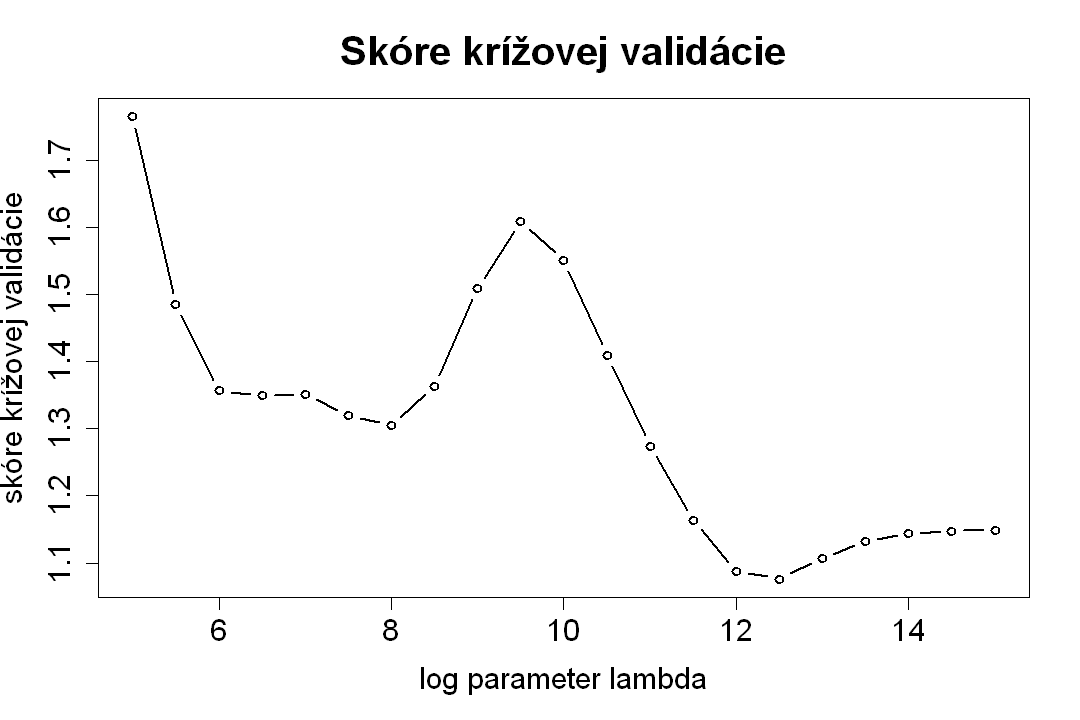

In [28]:
options(repr.plot.width=9, repr.plot.height=6)
plot(loglam, SSE.CV, type="b",
     xlab="log parameter lambda",
     ylab="skóre krížovej validácie",cex.lab=1.5,cex.axis=1.5,lwd=2, main="Skóre krížovej validácie", cex.main=2)

Pre $\lambda = 10^{12.5}$ máme optimálne CV skóre, preto teraz zopakujeme celý proces regresie a porovnáme výsledky s hodnotou $\lambda = 10$.

In [29]:
lambda        <- 10^12.5
betafdPar2    <- fdPar(betafd2, linearny_diff_operator, lambda)
koeficienty_list[[2]] <- betafdPar2

SnF2 <- fRegress(celkove_zrazky, regresory_fd_list, koeficienty_list)

beta_list_odhad   <- SnF2$betaestlist
celkove_zrazky_odhad <- SnF2$yhatfdobj
betafdPar <- beta_list_odhad[[2]]
betafd    <- betafdPar$fd

[1] "done"

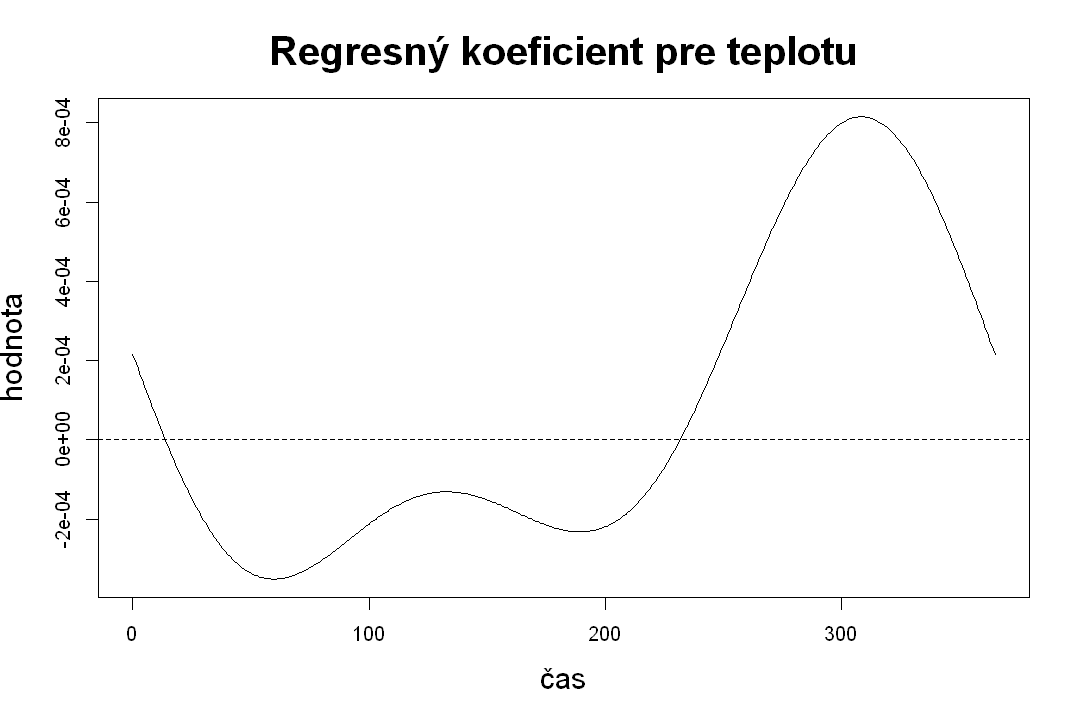

In [30]:
options(repr.plot.width=9, repr.plot.height=6)
plot(betafd,main="Regresný koeficient pre teplotu", cex.main=2, cex.lab=1.5, xlab="čas", ylab="hodnota")

In [31]:
celkove_zrazky_odhad2<-SnF2$yhatfdobj
rezidua3<-celkove_zrazky - celkove_zrazky_odhad2
SSE22<-sum(rezidua3^2)
SSE022<-sum((celkove_zrazky - mean(celkove_zrazky))^2)
RSQ22<-(SSE022-SSE22)/SSE022
RSQ22

[1] 0.7537658

[1] "done"

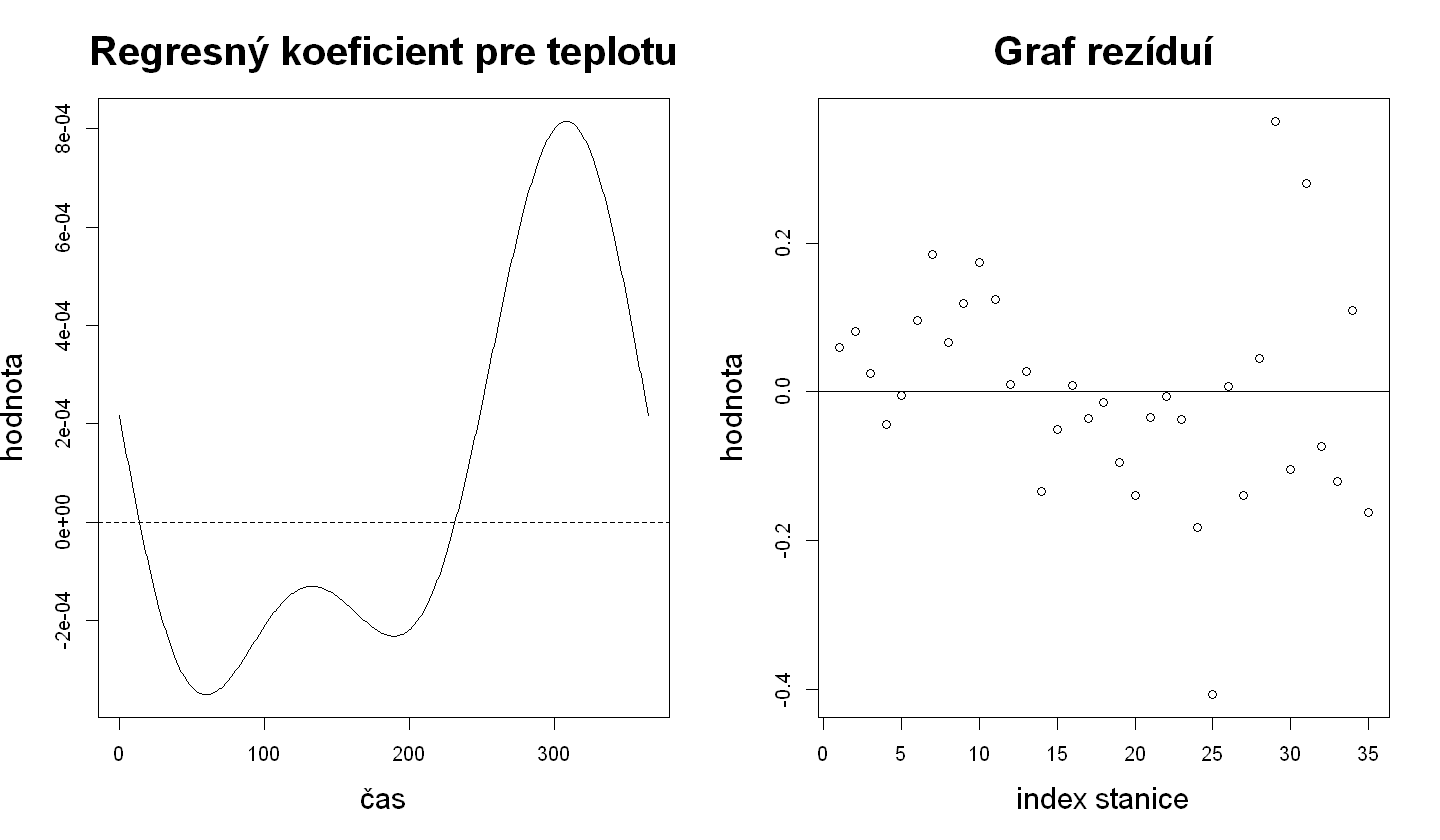

In [32]:
options(repr.plot.width=12, repr.plot.height=7)
par(mfrow=c(1,2))
plot(betafd,main="Regresný koeficient pre teplotu", cex.main=2, cex.lab=1.5, xlab="čas", ylab="hodnota")
plot(rezidua3, type="p", main="Graf rezíduí", xlab="index stanice", ylab="hodnota", cex.main=2, cex.lab=1.5)
abline(0,0)

Hoci **beta funkcia** je **viac vyhladená**, **koeficient determinácie** má hodnotu **75,38%**. Naďalej platí, že nevieme kvalitu modelu overiť pomocou klasickej analýzy rezíduí.

**<font size=4 color=darkgreen> 2.3 Odhad funkcie $\beta$ pomocou funkcionálnych hlavných komponentov</font>** <br>

Problém nájdenia minima beta funkcie zavŕšime tretím riešením, odhadom beta funkcie pomocou skóre FCPA. 

Využijeme aproximácie $$X_i(t) \approx \hat{\mu}(t) + \sum_{j=1}^{p} \hat{\xi}_{ij}\hat{v}_j(t)\qquad a \qquad \hat{\xi}_{ij} = \int \left[ X_i(t) - \hat{\mu}(t) \right]\hat{v}_j(t)dt.$$ 

Model sa teda redukuje na 
\begin{split}
		Y_i
		& = \alpha + \int\beta(t) \left( \hat{\mu}(t)+\sum_{j=1}^{p}\hat{\xi}_{ij}\hat{v}_j(t)\right) dt +\epsilon_i, \\
		& = \beta_0 +\sum_{j=1}^{p}\hat{\xi}_{ij}\beta_j + \epsilon_i,
	\end{split}
kde
$$ \beta_0 = \alpha + \int \beta(t)\hat{\mu}(t)dt \qquad a \qquad \beta_j = \int \beta(t)\hat{v}_j(t)dt$$

sa považujú za neznáme parametre. Za regresory vezmeme skóre vybraných funkcionálnych hlavných komponentov. 

[1] "done"

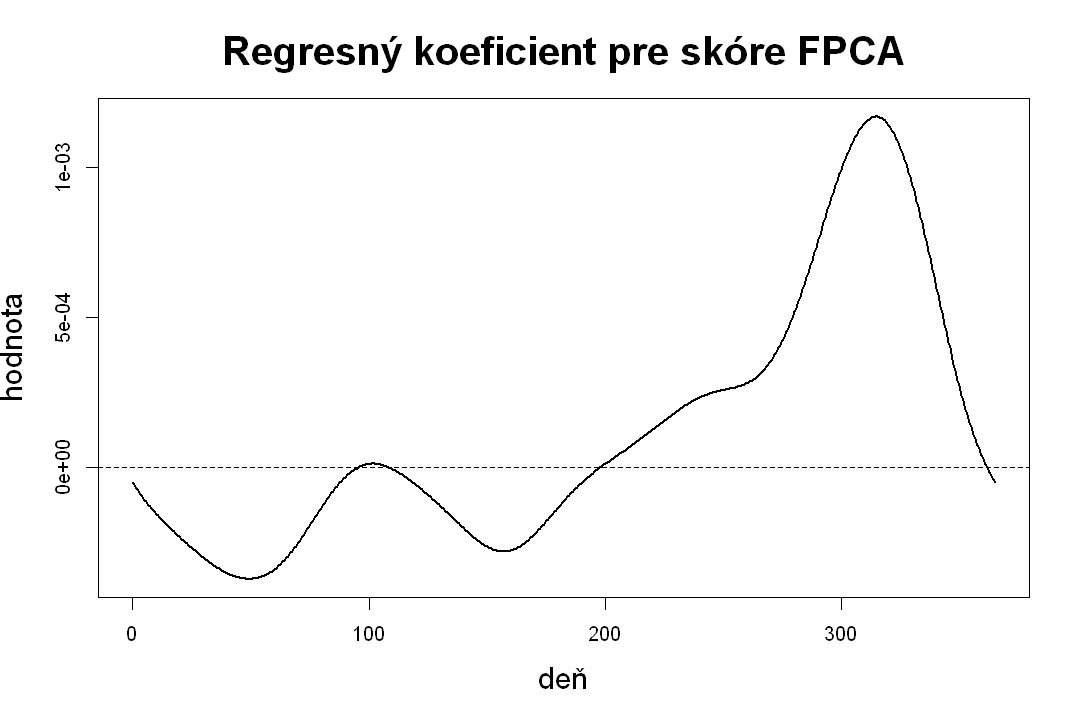

In [33]:
# vyuzijeme vysledky z fpca po rotacii VARIMAX 
harmonics<-daytemppcaobjVM$harmonics

# Ramsay a kol. (2009) vykonava jednoduchy regresny model pre tento pripad, avsak s naslednym dopocitanim beta funkcie
pcamodel<-lm(celkove_zrazky~daytemppcaobjVM$scores)
pcacoefs<-summary(pcamodel)$coef

# kazde skore komponentu vynasobime s prislusnym odhadovanym koeficientom
betafd<-pcacoefs[2,1]*harmonics[1] +pcacoefs[3,1]*harmonics[2] +pcacoefs[4,1]*harmonics[3]
options(repr.plot.width=9, repr.plot.height=6)
plot(betafd, xlab="deň", ylab="hodnota",main="Regresný koeficient pre skóre FPCA", cex.main=2, cex.lab=1.5, lwd=2)

In [34]:
summary(pcamodel)


Call:
lm(formula = celkove_zrazky ~ daytemppcaobjVM$scores)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39686 -0.07941 -0.01693  0.06823  0.36386 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -1.902e-16  2.520e-02   0.000    1.000    
daytemppcaobjVM$scoresPCA.1 -1.163e-03  1.380e-03  -0.843    0.406    
daytemppcaobjVM$scoresPCA.2  1.435e-03  1.443e-03   0.994    0.328    
daytemppcaobjVM$scoresPCA.3 -8.253e-03  1.775e-03  -4.649 6.26e-05 ***
daytemppcaobjVM$scoresPCA.4 -1.904e-03  1.666e-03  -1.142    0.262    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1491 on 30 degrees of freedom
Multiple R-squared:  0.757,	Adjusted R-squared:  0.7246 
F-statistic: 23.36 on 4 and 30 DF,  p-value: 7.518e-09


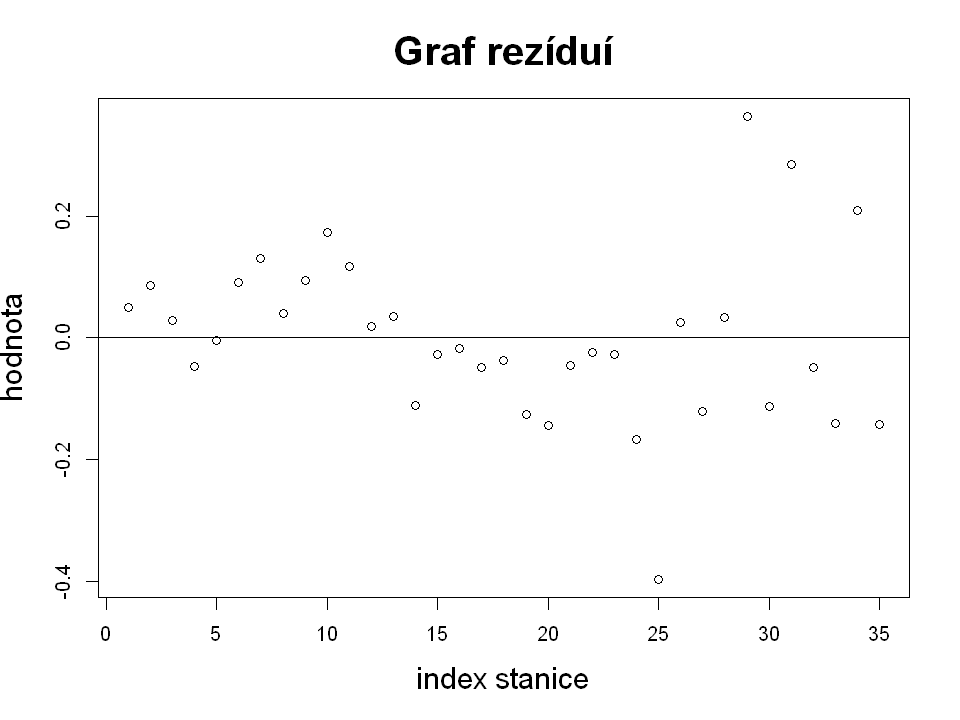

In [35]:
options(repr.plot.width=8, repr.plot.height=6)
plot(pcamodel$residuals, type="p", main="Graf rezíduí", xlab="index stanice", ylab="hodnota", cex.main=2, cex.lab=1.5)
abline(0,0)

Regresný koeficient je pomerne dobre vyladený, aj keď kolíše okolo nulovej hodnoty. Naďalej platí, že nevieme kvalitu modelu overiť pomocou klasickej analýzy rezíduí.

---
<a id=FnS></a>
**<font size=5 color=darkgreen> 3. Regresia s funkcionálnou odozvou a skalárnymi regresormi </font>** <br>

Regresia s **funkcionálnou** odozvou a **skalárnymi** regresormi (FnS) má tvar

$$ Y_i(t) = \sum_{k=1}^{p} x_{ik}\beta_k(t) + \epsilon_i(t). $$


Modeluje ročné teplotné profily na základe ročných celkových zrážok (v log. škále). Závislou premennou budú teplotné profily a nezávislou premennou log. celkové zrážky.

Využijeme funkciu `pffr()`, ktorej vstup je v porovnaní s predchádzajúcou implementáciou pomerne jednoduchší, menej prácny. Odpadáva ručné zadávanie parametrov $\lambda$ a vstupom je matica, resp. vektor pozorovaní a nie funkcionálny objekt triedy `fd()`, alebo `fdPar()` s typom bázy, počtom funkcií v nej a intervalom pozorovania. Tieto parametre funkcia vypočíta sama (na základe nami zvolenej, alebo prednastavenej metódy). Viac detailov nájdeme v jej [dokumentácií](https://rdrr.io/cran/refund/man/pffr.html}{https://rdrr.io/cran/refund/man/pffr.html). 

In [36]:
day <- 1:365
# za odozvy vezmeme maticu teplot a za regresory vektor celkovych zrazok
Y <- t(as.matrix(CanadianWeather$dailyAv[,,"Temperature.C"]-rowMeans(CanadianWeather$dailyAv[,,"Temperature.C"])))
X <- as.vector(colSums(CanadianWeather$dailyAv[,,3])) - mean(as.vector(colSums(CanadianWeather$dailyAv[,,3])))

myDat <- data.frame(X = X)
myDat$Y <- Y

In [37]:
# vykoname samotnu regresiu
fit <- pffr(Y ~ X, data = myDat)

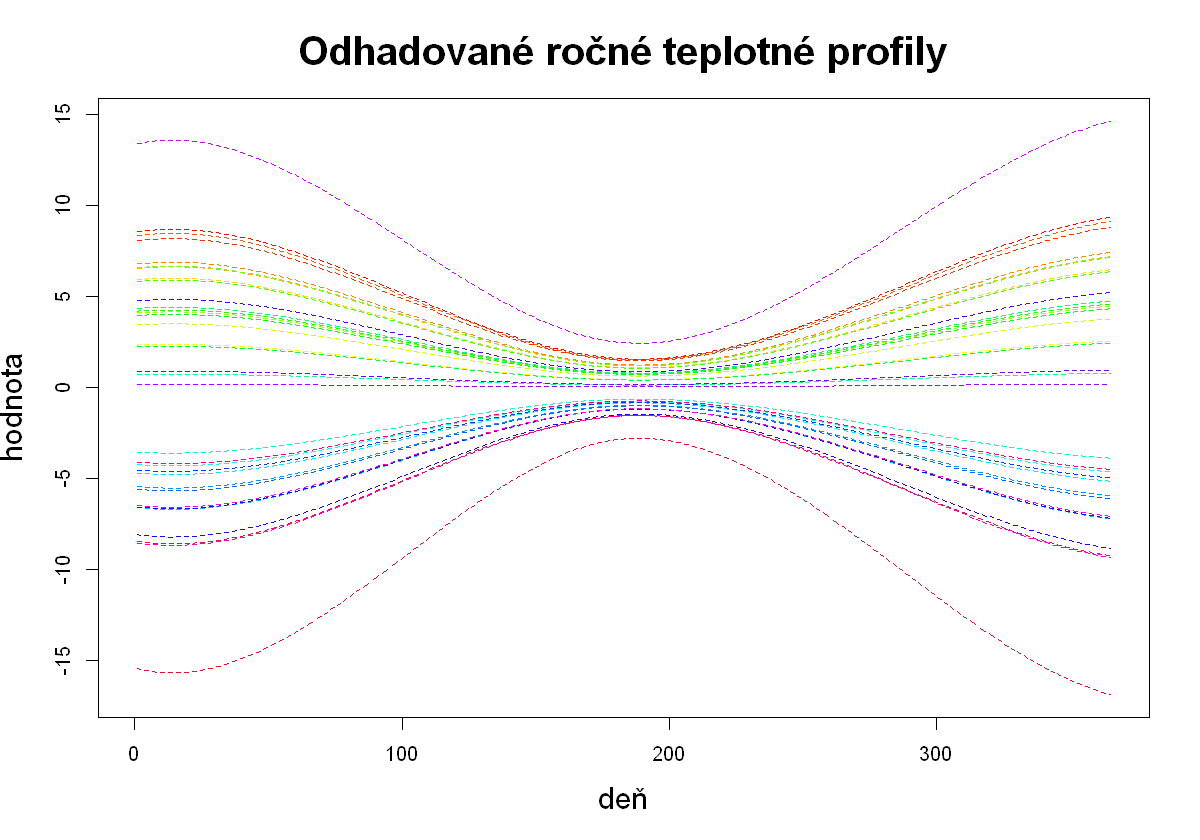

In [38]:
options(repr.plot.width=10, repr.plot.height=7)
matplot(t(fitted(fit)), type="l", xlab="deň", ylab="hodnota", main="Odhadované ročné teplotné profily"
     ,cex.main=2, cex.lab=1.5, col=rainbow(35), lty=2)

using seWithMean for  s(yindex.vec) .


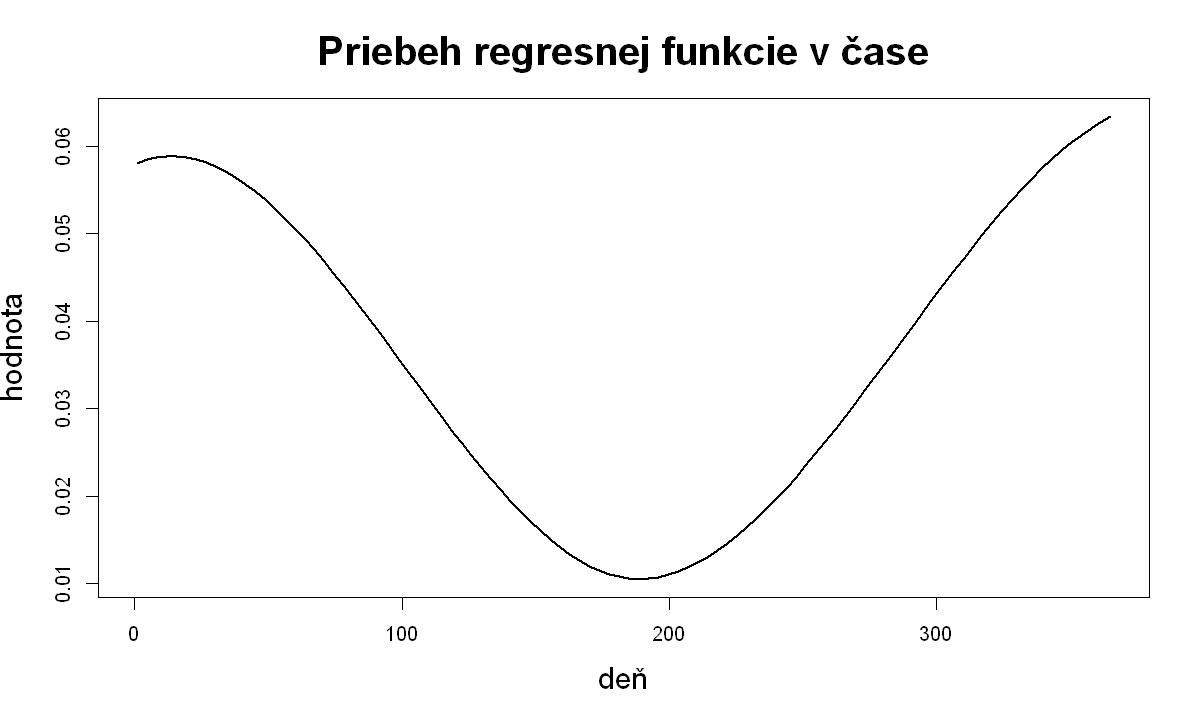

In [39]:
coef <- coef(fit)
beta0.hat <- coef$smterms$`Intercept(yindex)`$coef
beta1.hat <- coef$smterms$`X(yindex)`$coef
options(repr.plot.width=10, repr.plot.height=6)
plot(beta0.hat$yindex.vec, beta1.hat$value, type='l', lwd=2, xlab="deň", ylab="hodnota",
     main="Priebeh regresnej funkcie v čase",  cex.main=2, cex.lab=1.5)

Pre hodnoty **regresnej funkcie**, ktorá je hladká vidíme, že nadobúda kladné hodnoty **blízke nule**.

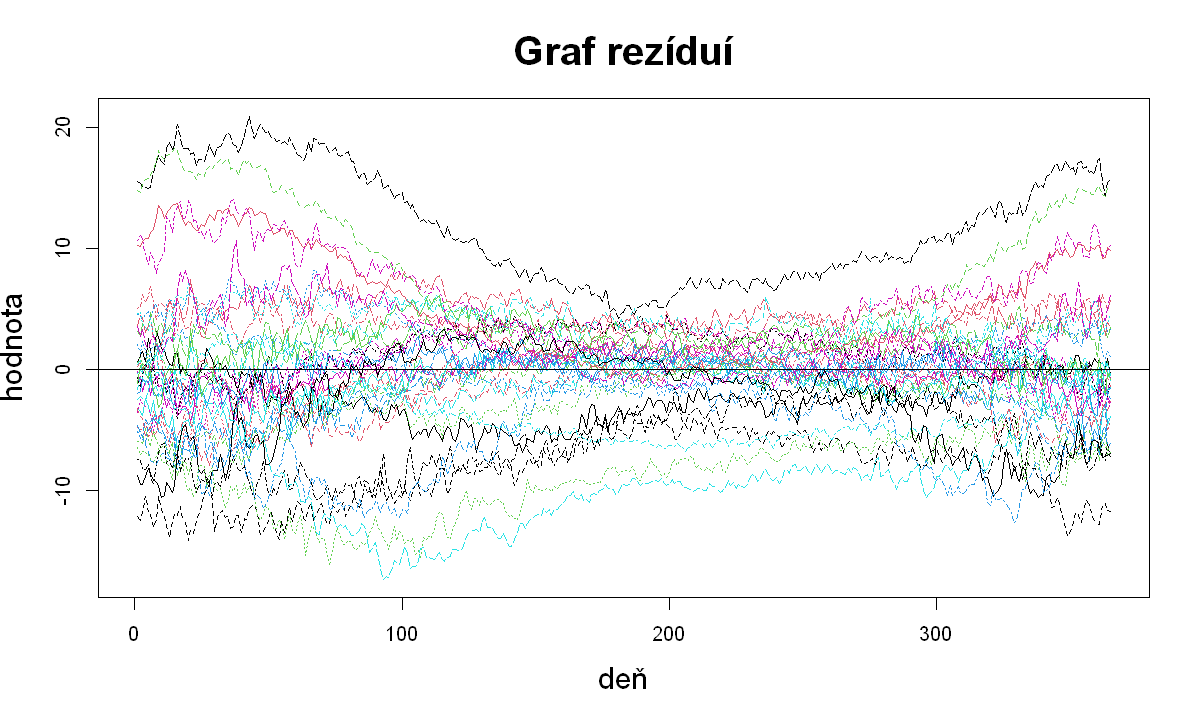

In [40]:
matplot(t(residuals(fit)), type="l", xlab="deň", ylab="hodnota", main="Graf rezíduí"
     ,cex.main=2, cex.lab=1.5 )
abline(0,0)

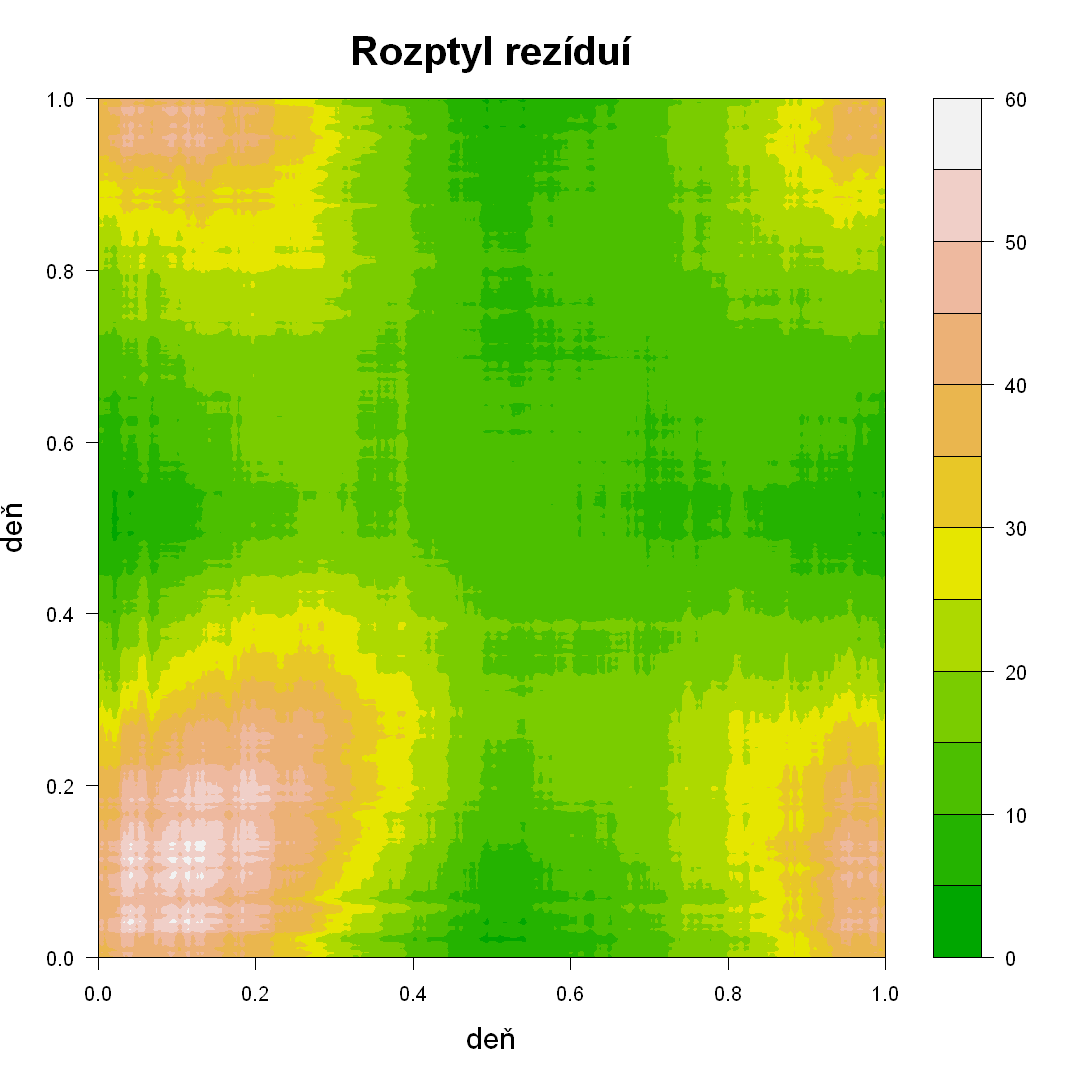

In [41]:
SigmaE   <- var(residuals(fit))
options(repr.plot.width=9, repr.plot.height=9)
filled.contour(SigmaE, xlab="deň", ylab="deň", cex.lab=1.5,color.palette = terrain.colors, 
               main="Rozptyl rezíduí", cex.main=2)

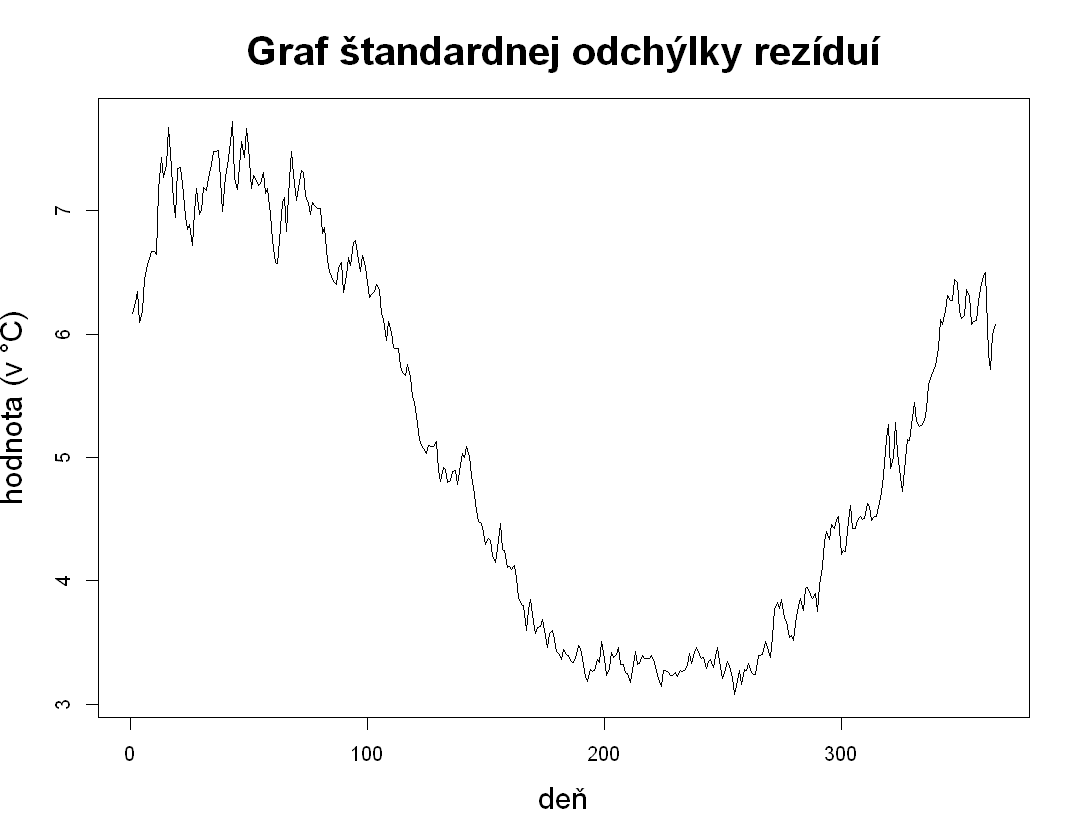

In [42]:
stddevE <- sqrt(diag(SigmaE))
options(repr.plot.width=9, repr.plot.height=7)
plot(day, stddevE, type="l",
     xlab="deň", ylab="hodnota (v °C)", main="Graf štandardnej odchýlky rezíduí"
     ,cex.main=2, cex.lab=1.5)

**Rezíduá** ťažko pomenovať náhodným šumom (ale už vieme s nimi narábať, ako časový rad).
Ich **rozptyl** nie je konštantný v čase.

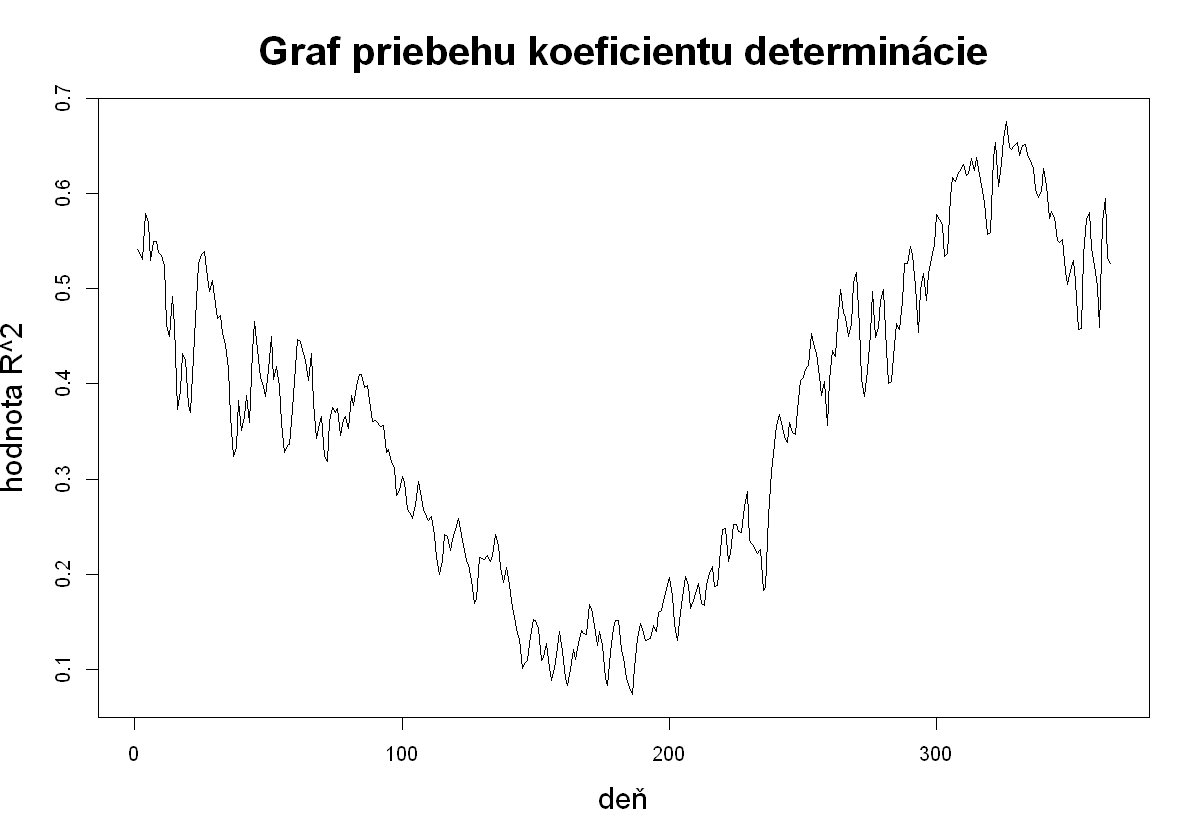

In [43]:
# vyratame si koeficient determinacie modelu, ktory ma priebeh v sledovanom case
Rsq_t <- 1-colSums((Y - fitted(fit))^2) / colSums((Y - colMeans(Y))^2)
options(repr.plot.width=10, repr.plot.height=7)
plot(Rsq_t, type="l",xlab="deň", ylab="hodnota R^2", main="Graf priebehu koeficientu determinácie"
     ,cex.main=2, cex.lab=1.5)

**Koeficient determinácie** modelu je vzhľadom na čas neustálený.

In [44]:
mshapiro.test(t(residuals(fit)))


	Multivariate Shapiro-Wilk normality test

data:  ()
W = 0.91636, p-value = 2.283e-13


**Viacrozmerný Shapirov-Wilkov** test zamieta ich normalitu (p=2,283e-13). 

Už z grafu rezíduí vidíme, že náš model nie je správny. Dokazuje to aj vývoj koeficientu determinácie, ktorý nadobúda v určitom čase veľmi malé hodnoty. Našim cieľom nie je nájsť ten správny model, ale ukázať implementáciu modelu pre danú modelovú situáciu. Na nájdenie toho správneho modelu by sme potrebovali zovšeobecnený funkcionálny regresný model (nevedomky ho využívame pri implementácií funkcie `pffr()`, ktorý v práci neuvádzame.

---
<a id=FnF></a>
**<font size=5 color=darkgreen> 4. Regresia s funkcionánou odozvou aj regresormi </font>** <br>

Regresia s **funkcionálnou** odozvou a **funkcionálnymi** regresormi (FnF) má tvar

$$ Y_i(t) =  \int \beta(t,s) X_i(s) ds + \epsilon_i(t). $$

Tento model odhaduje ročné logaritmické profily zrážok na základe ročných teplotných profilov. Závislou premenou budú ročné logaritmické zrážky a nezávislou premennou budú ročné teplotné profily.

Zásadným rozdielom oproti predchádzajúcim modelom je to, že beta funkcia má teraz dve premenné, $s$ a $t$. V kontexte nášho príkladu to znamená, že zrážky v konkrétnom čase $t_1$ závisia od celého teplotného profilu $X_i(s)$. 

Využili sme funkciu `linmod()` z balíka *fda* (Ramsay a kol., 2022), ktorého využitie je podobne prácne, ako u funkcie `fRegress()`. 

In [45]:
# nulove zrazky si kvoli log transformacii nahradime hodnotou 0,05 mm
zrazky<- CanadianWeather$dailyAv[,,"Precipitation.mm"]
for (j in 1:35) {
  index <- zrazky[,j] == 0
  zrazky[index,j] <- 0.05}

In [46]:
# zlogaritmujeme zrazky
logzrazky <- log10(zrazky)
logzrazky<-(logzrazky)-rowMeans(logzrazky)
# vyhladime si udaje o zrazkach 
logzrazky_fd <- smooth.basis(day.5, logzrazky, daybasis65)$fd
logzrazky_fd_names <- vector("list",3)
logzrazky_fd_names[[1]] <- "čas"
logzrazky_fd_names[[2]] <- "stanica"
logzrazky_fd_names[[3]] <- "log mm"
logzrazky_fd$fdnames <- logzrazky_fd_names

In [47]:
# zavedieme si "penalizovane vyrazy" a lambdy   
xLfdobj <- linearny_diff_operator
yLfdobj <- linearny_diff_operator
xlambda <- 1e9
ylambda <- 1e7

betalist   <- vector("list",2)
# vytvorime si pre konstantny clen funkcionalny objekt 
betabaza1 <- create.constant.basis(c(0, 365))
betafd1    <- fd(0, betabaza1)
betafdPar1 <- fdPar(betafd1)
betalist[[1]] <- betafdPar1
# pre bety koeficienty si tiez vytvorime funkcionalny objekt
nbetabaza  <- 65
betabaza2  <- create.fourier.basis(c(0, 365), nbetabaza)
beta_fd2     <- bifd(matrix(0,nbetabaza,nbetabaza), betabaza2, betabaza2)
betalist[[2]] <- bifdPar(beta_fd2, Lfdobjs=linearny_diff_operator, Lfdobjt=linearny_diff_operator, lambdas=1e9, lambdat=1e7,
        estimate=TRUE)

In [48]:
# vykoname dany typ regresie pomocou funkcie linmod()
FnF <- linmod(daytempfd, logzrazky_fd, betalist )
# beta funkcia dvoch premennych
bfd <- FnF$beta1estbifd    

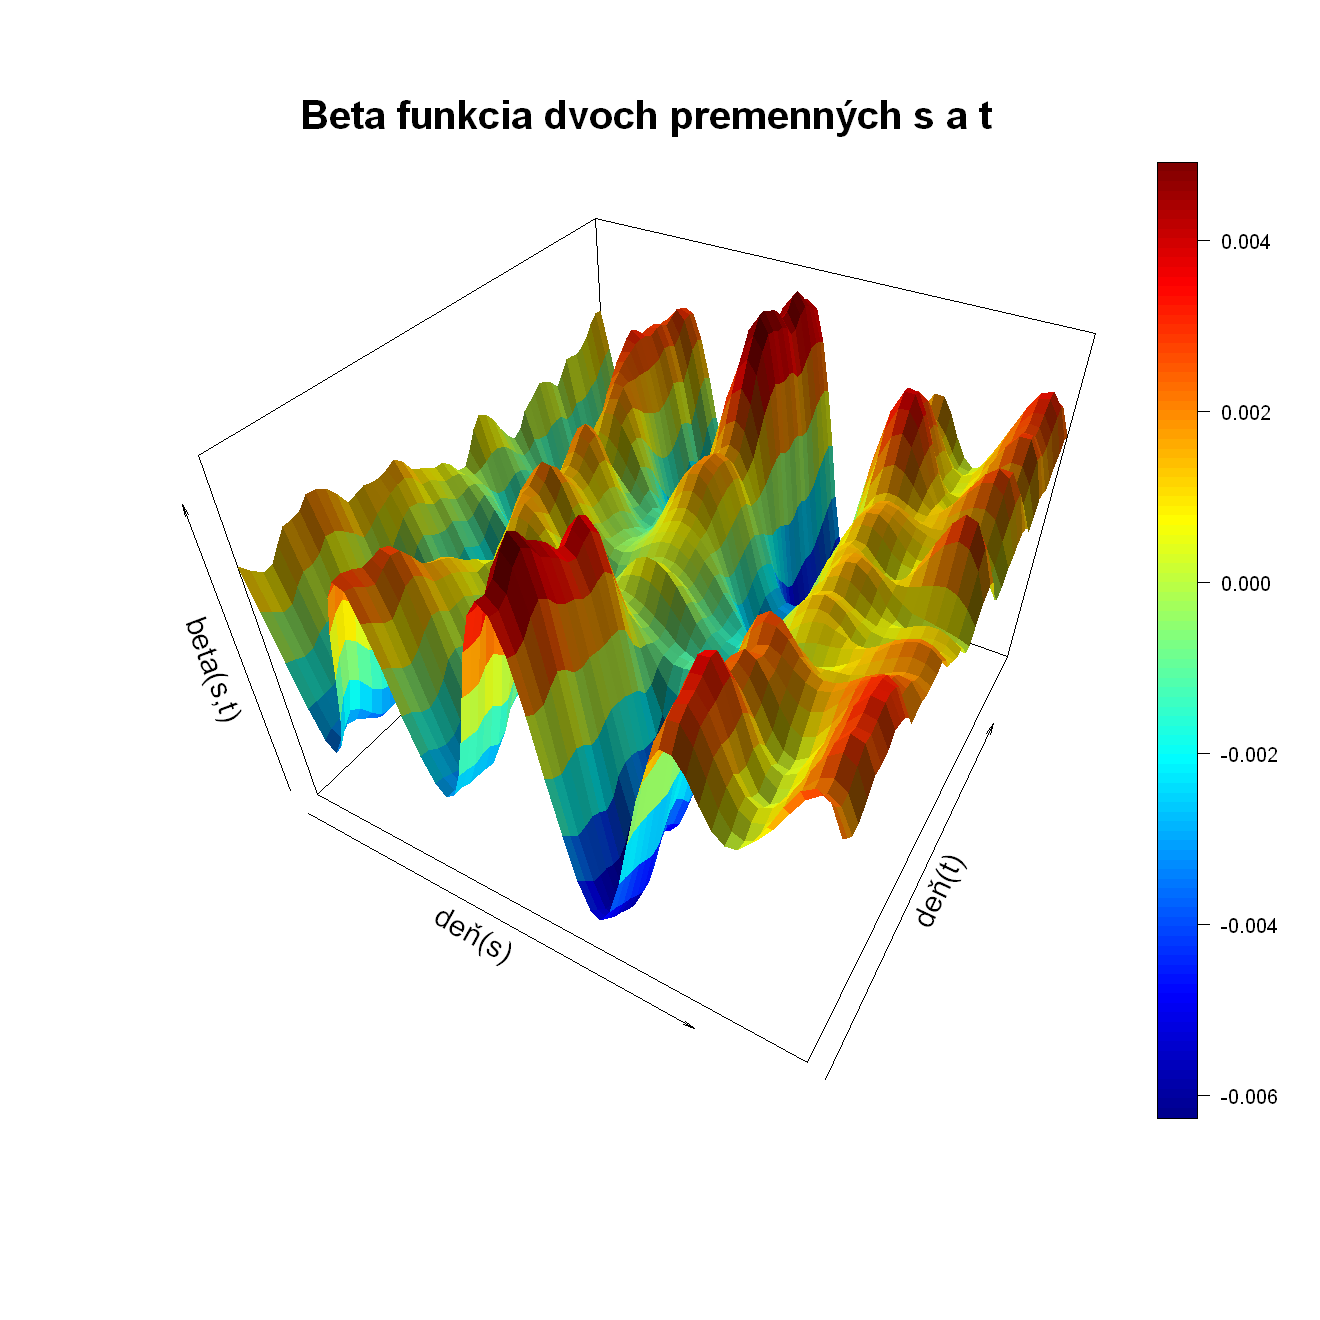

In [49]:
# vykreslime si teraz funkciu (dvoch premennych) beta v trojrozmernom priestore
bfdmapa <- eval.bifd(weeks, weeks, bfd)
options(repr.plot.width=11, repr.plot.height=11)
persp3D(weeks, weeks, bfdmapa, xlab="deň(s)", ylab="deň(t)",zlab="beta(s,t)",theta = 30, phi = 40,expand = 0.75, 
      col.palette = heat.colors,
      shade = 0.3, cex.lab=1.5,main="Beta funkcia dvoch premenných s a t", cex.main=2)

**Beta funkcia** nadobúda hodnoty blízke **nule**, avšak vzhľadom na $s$ aj $t$ **kolíšu**.

In [50]:
logzrazky_odhad <- FnF$yhatfd

logzrazky_priemer   <- eval.fd(day.5, mean.fd(logzrazky_fd))
logzrazky_fdmat    <- eval.fd(day, logzrazky_fd)
logzrazky_odhadmat <- eval.fd(day, logzrazky_odhad)

[1] "done"

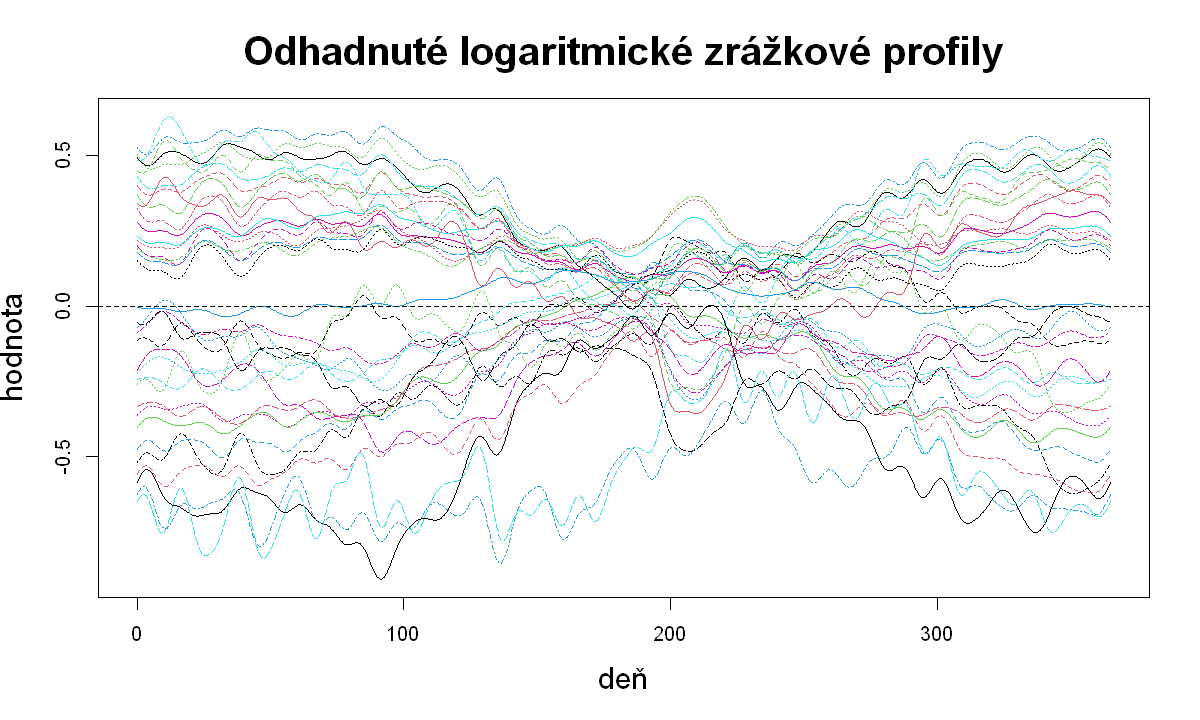

In [51]:
options(repr.plot.width=10, repr.plot.height=6)
plot(logzrazky_odhad, xlab="deň", ylab="hodnota", main="Odhadnuté logaritmické zrážkové profily", cex.main=2, cex.lab=1.5)

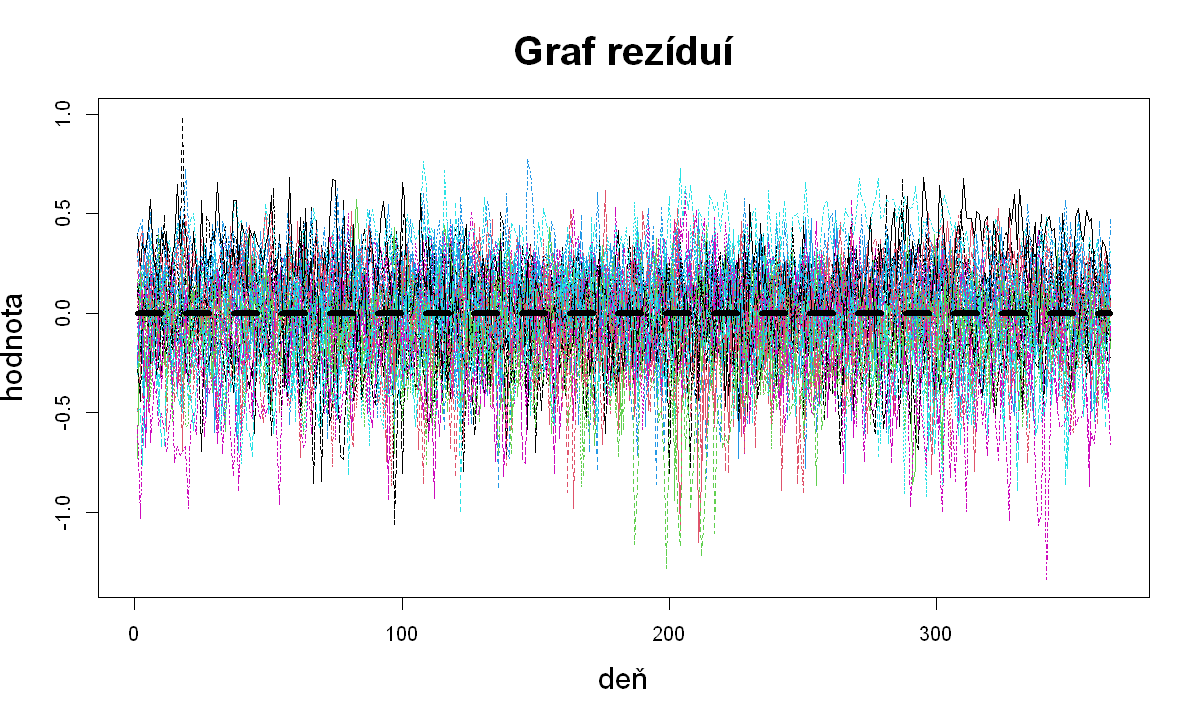

In [52]:
rezidua5<-logzrazky-logzrazky_odhadmat
matplot(day,rezidua5, type="l", main="Graf rezíduí", xlab="deň", ylab="hodnota", cex.main=2, cex.lab=1.5)
lines(rowMeans(rezidua5), lwd=5 , lty=2)

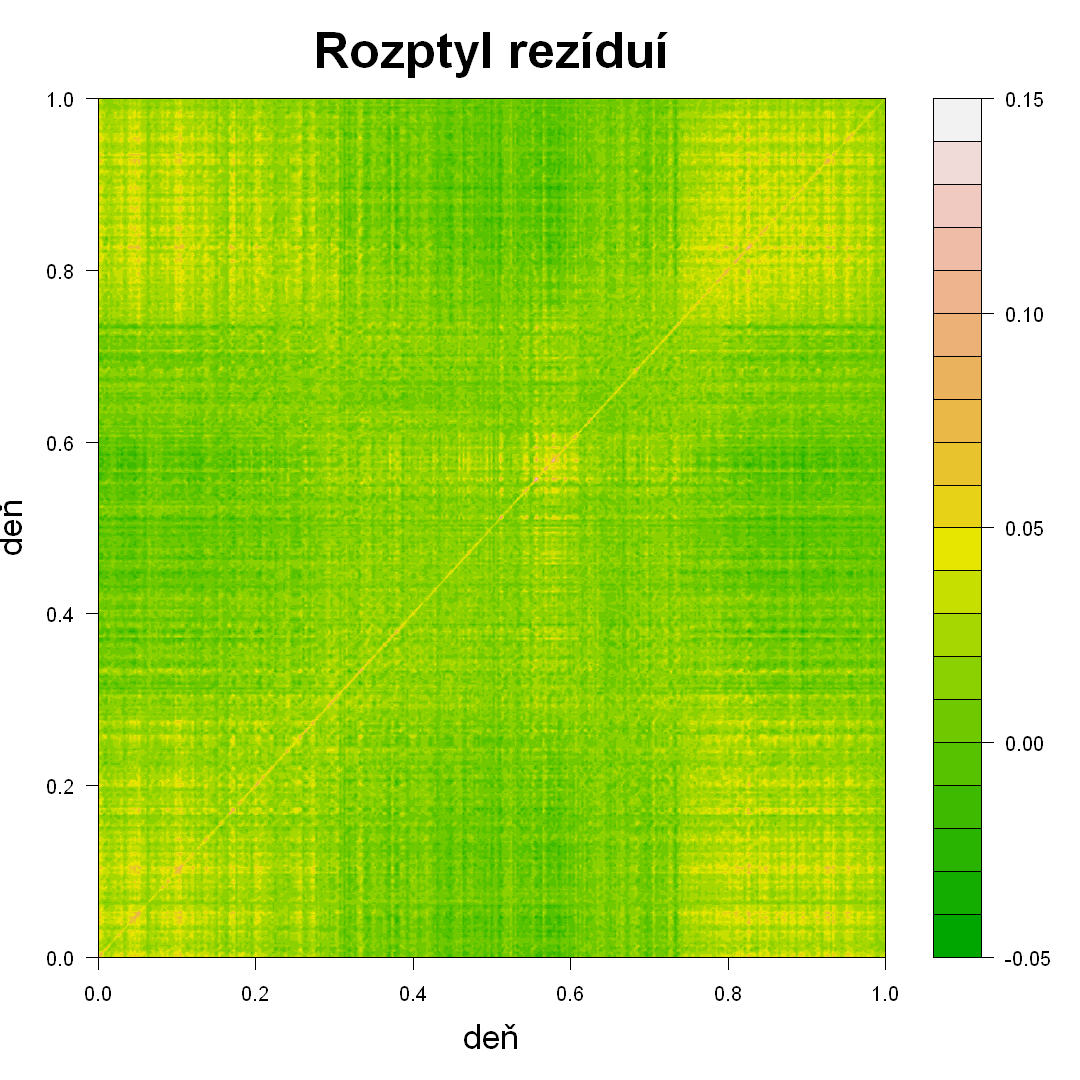

In [53]:
SigmaE5   <- var(t(rezidua5))
par(mfrow=c(1,1))
options(repr.plot.width=9, repr.plot.height=9)
filled.contour(SigmaE5, xlab="deň", ylab="deň", cex.lab=1.75,color.palette = terrain.colors, 
               main="Rozptyl rezíduí", cex.main=2.5)

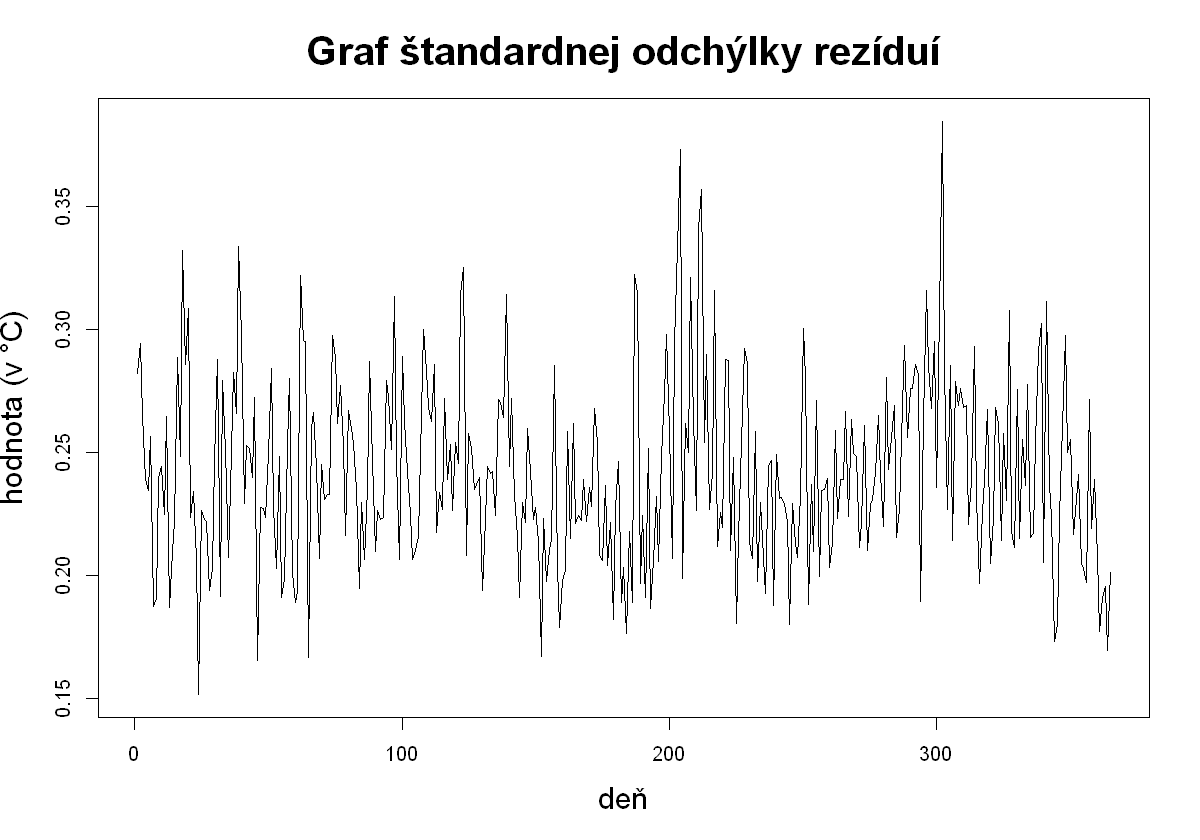

In [54]:
stddevE5 <- sqrt(diag(SigmaE5))
options(repr.plot.width=10, repr.plot.height=7)
plot( day,stddevE5, type="l", xlab="deň", ylab="hodnota (v °C)", main="Graf štandardnej odchýlky rezíduí"
     ,cex.main=2, cex.lab=1.5)

Zobrazené **rezídua** majú **nulový priemer** a ich **rozptyl** je v čase zhruba **konštantný**.

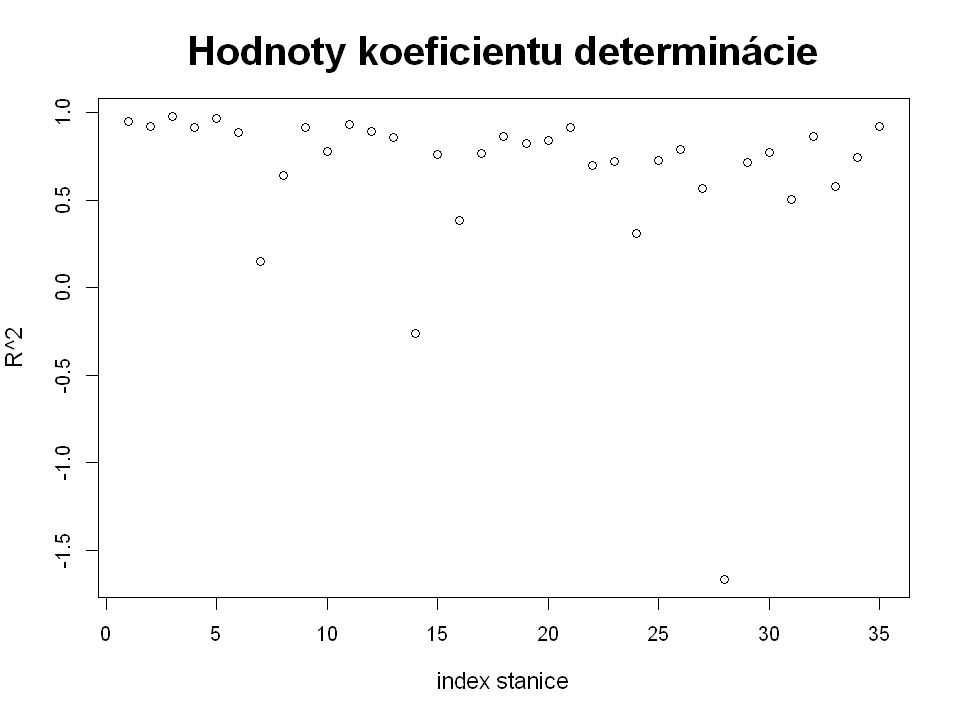

In [55]:
R2<-c()
# vyratame si koeficient determinacie modelu za cely cas, ale pre kazdu stanicu zvlast
for (i in 1:35) {
  lnpreci    <- eval.fd(logzrazky_fd[i],    day.5)
  lnprechati <- eval.fd(logzrazky_odhad[i], day.5)
  SSE <- sum((lnpreci-lnprechati)^2)
  SSY <- sum((lnpreci-logzrazky_priemer)^2)
  RSQ <- (SSY-SSE)/SSY
  R2<-c(R2,RSQ)}
options(repr.plot.width=8, repr.plot.height=6)
plot(R2, xlab="index stanice", ylab="R^2", main="Hodnoty koeficientu determinácie", cex.lab=1.15, cex.main=2)

**Koeficienty determinácie** ukazujú na **rôznorodosť** kvality modelu pre jednotlivé meteorologické stanice.

In [56]:
mshapiro.test(rezidua5)


	Multivariate Shapiro-Wilk normality test

data:  (St. Johns,Halifax,Sydney,Yarmouth,Charlottvl,Fredericton,Scheffervll,Arvida,Bagottville,Quebec,Sherbrooke,Montreal,Ottawa,Toronto,London,Thunder Bay,Winnipeg,The Pas,Churchill,Regina,Pr. Albert,Uranium City,Edmonton,Calgary,Kamloops,Vancouver,Victoria,Pr. George,Pr. Rupert,Whitehorse,Dawson,Yellowknife,Iqaluit,Inuvik,Resolute)
W = 0.87477, p-value < 2.2e-16


**Viacrozmerný Shapirov-Wilkov** test zamietol ich normalitu (p < 2,2e-16). 

In [57]:
res.face10 <- fpca.face(Y = t(rezidua5), argvals = 1:365, pve = 0.97)
efn.face10 <- res.face10$efunctions*sqrt(365)
eval.face10 <- res.face10$evalues/365
pve.face10 <- (cumsum(eval.face10)/sum(eval.face10))

res.face11 <- fpca.face(Y = t(logzrazky_odhadmat), argvals = 1:365, pve = 0.98)
efn.face11 <- res.face11$efunctions*sqrt(365)
eval.face11 <- res.face11$evalues/365
pve.face11 <- (cumsum(eval.face11)/sum(eval.face11))

Warning message in sqrt(Eigen$values):
"NaNs produced"


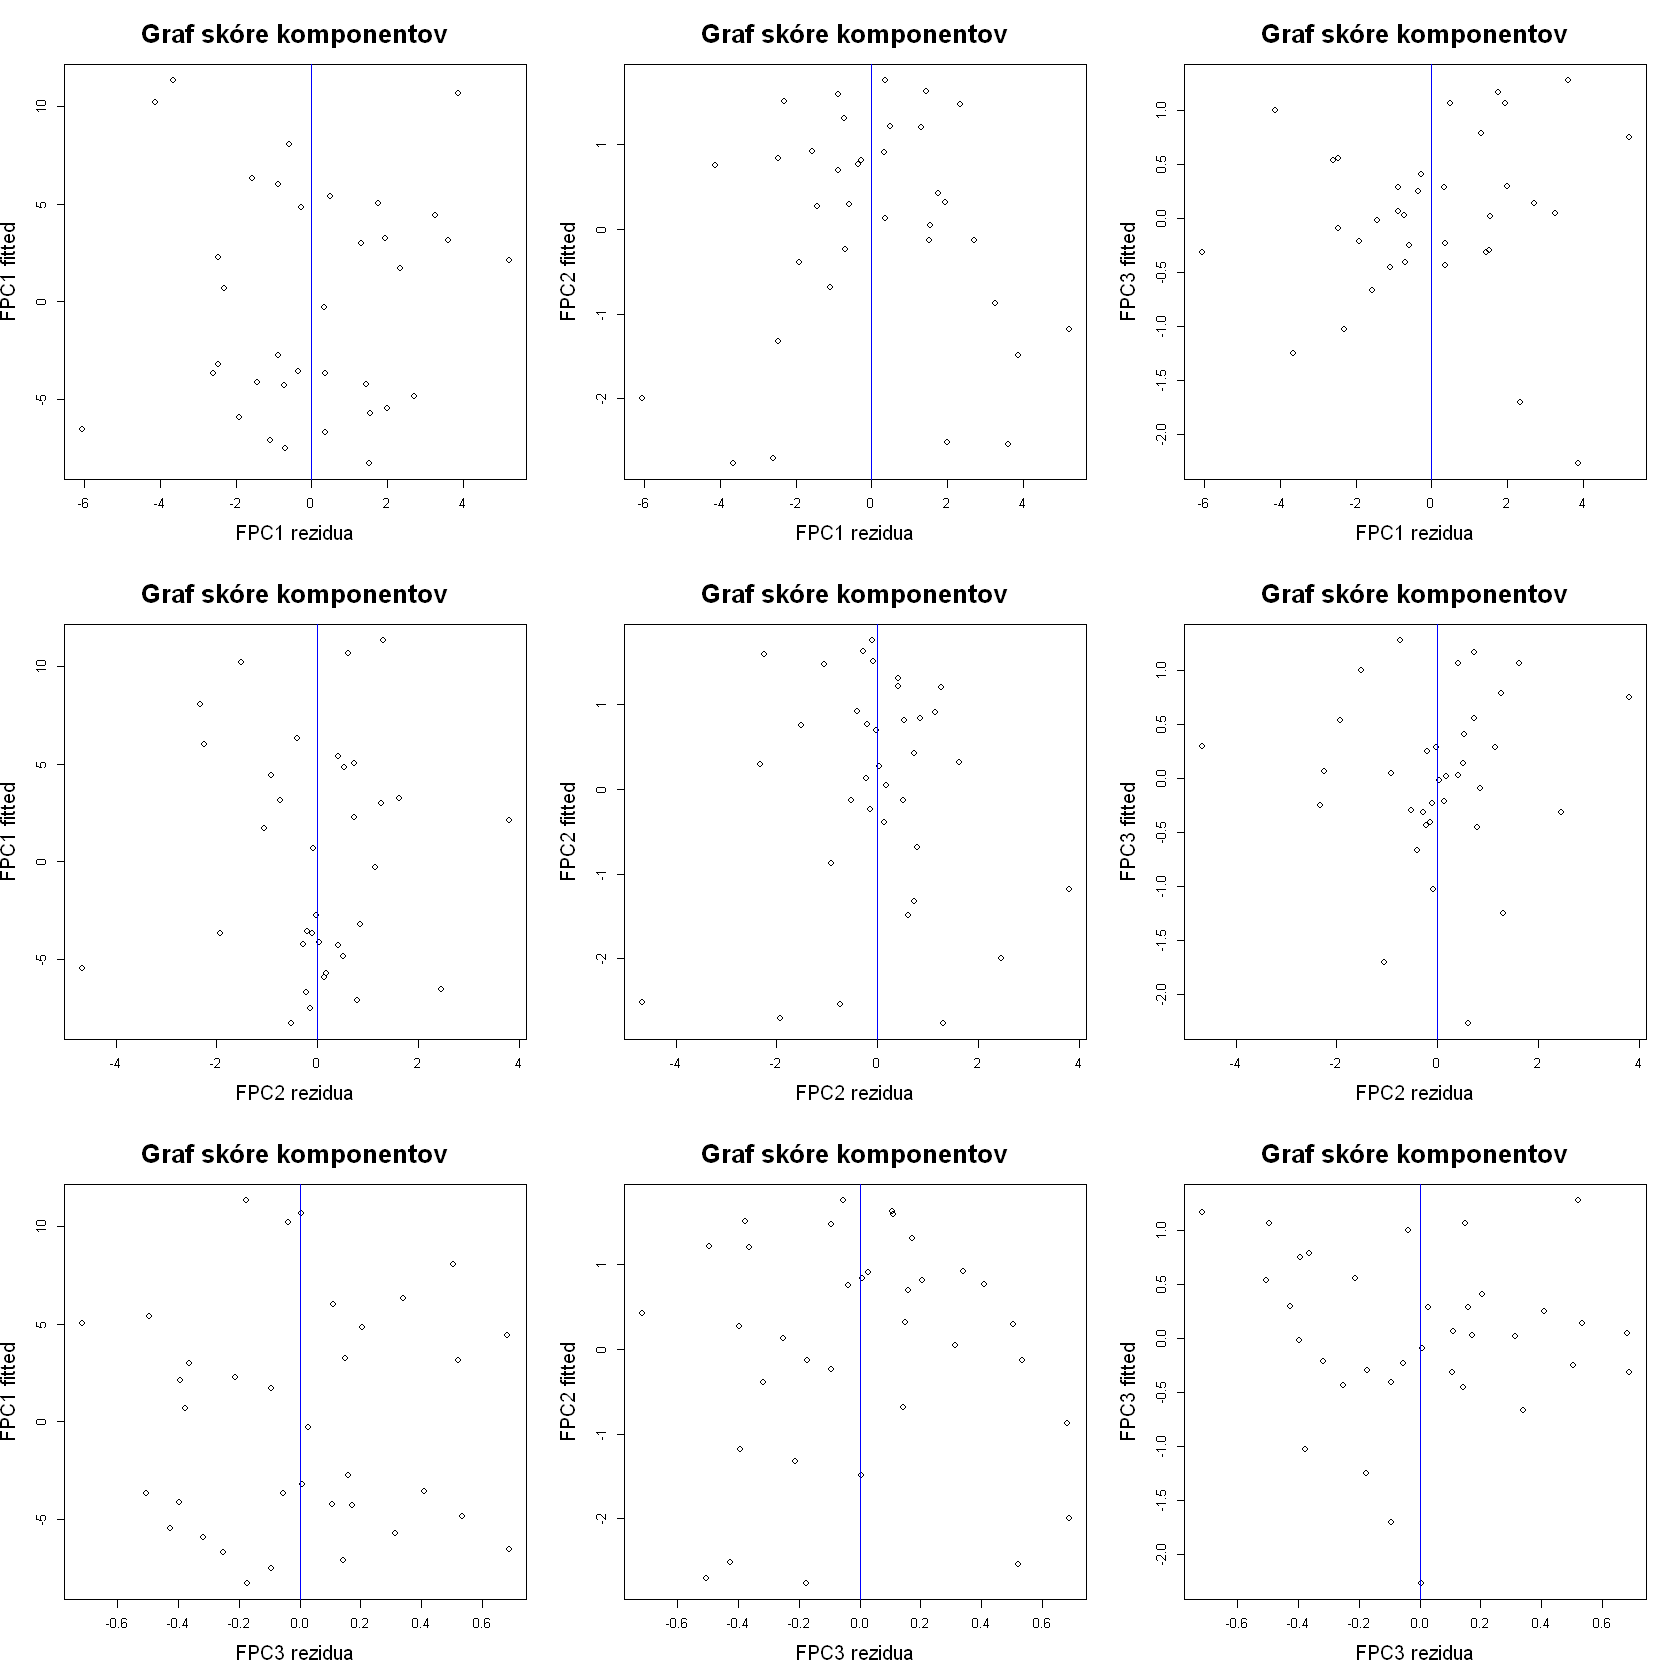

In [58]:
options(repr.plot.width=14, repr.plot.height=14)
par(mfrow=c(3,3))
for (i in 1:3) {
    for (j in 1:3)
        { plot(res.face10$scores[,i],res.face11$scores[,j], xlab=paste0("FPC",i, " rezidua"), 
               ylab=paste0("FPC",j, " fitted"), main="Graf skóre komponentov", cex.main=2, cex.lab=1.5) 
        abline(v=0, col="blue")}}

In [59]:
res.face20 <- fpca.face(Y = Y, argvals = 1:365, pve = 0.98)
efn.face20 <- res.face20$efunctions*sqrt(365)
eval.face20 <- res.face20$evalues/365
pve.face20 <- (cumsum(eval.face20)/sum(eval.face20))

res.face22 <- fpca.face(Y = t(logzrazky_fdmat) , argvals = 1:365, pve = 0.96)
efn.face22 <- res.face22$efunctions*sqrt(365)
eval.face22 <- res.face22$evalues/365
pve.face22 <- (cumsum(eval.face22)/sum(eval.face22))

Warning message in sqrt(Eigen$values):
"NaNs produced"


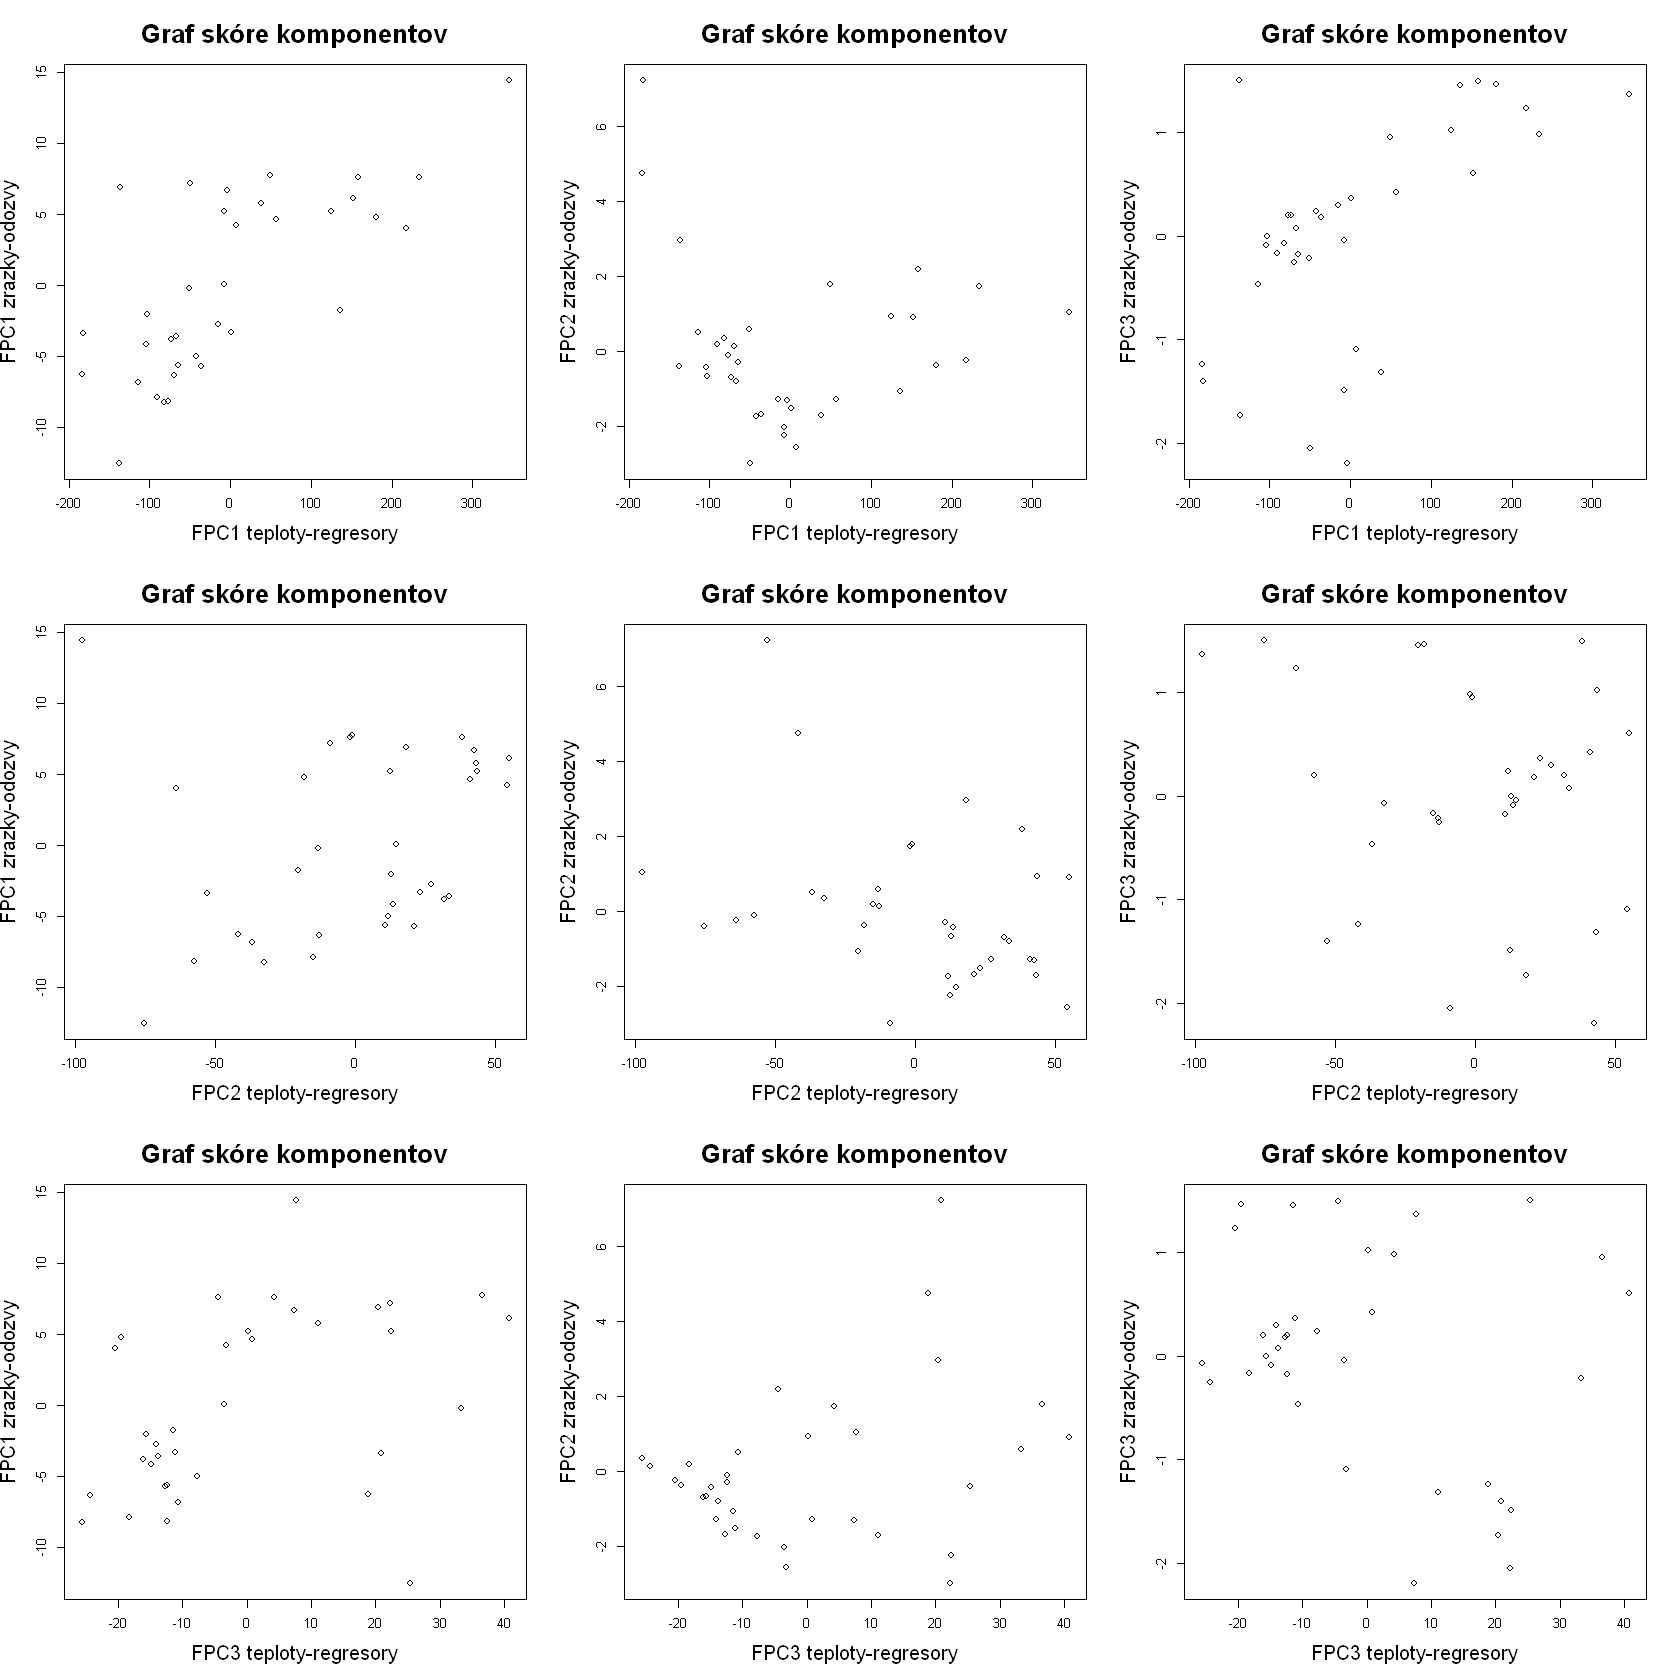

In [60]:
options(repr.plot.width=14, repr.plot.height=14)
par(mfrow=c(3,3))
for (i in 1:3) {
    for (j in 1:3)
        { plot(res.face20$scores[,i],res.face22$scores[,j], xlab=paste0("FPC",i, " teploty-regresory"), 
               ylab=paste0("FPC",j, " zrazky-odozvy"), main="Graf skóre komponentov", cex.main=2, cex.lab=1.5)}}

Testovať vhodnosť modelu vieme aj pomocou hodnôt skóre komponentov FPCA. Na nasledujúcich obrázkoch máme zobrazené ich hodnoty pre dané dvojice. Môžeme vidieť, že hodnoty skóre FPCA pre rezíduá nie sú v okolí nuly (modrá čiara). Skóre FPCA pre dvojicu regresory - odozvy na druhom obrázku v niektorých prípadoch ukazujú na trend (napr obrázok vpravo hore). Preto model teda nie je úplne správny. Aj keď jednoznačnejšie výsledky by sme dostali pri väčšom počte pozorovaných meteorologických staníc. 

***
<a id=References></a>
# <font color=darkgreen> 5. Zdroje </font>

* Friendly, M., Fox, J. & Monette G (2022). heplots: Visualizing Tests in Multivariate Linear Models. R package version 1.4-2, https://CRAN.R-project.org/package=heplots.


* Goldsmith, J. et al., (2023). refund: Regression with Functional Data. 2023
<https://cran.r-project.org/web/packages/refund/index.html>


* Hervé, M. (2022). RVAideMemoire: Testing and Plotting Procedures for Biostatistics. R package
  version 0.9-81-2. https://CRAN.R-project.org/package=RVAideMemoire


* Kokoszka, P., & Reimherr, M. (2017). Introduction to Functional Data Analysis (1st edition). Chapman and Hall/CRC.

  
* Ramsay, J. O., Graves, S., & Hooker, G. (2022). fda: Functional Data Analysis. R package
  version 6.0.5. https://CRAN.R-project.org/package=fda
  

* Ramsay, J., Hooker, G., & Graves, S. (2009). Functional Data Analysis with R and MATLAB. Springer New York. 


* Soetaert, K. (2021). plot3D: Plotting Multi-Dimensional Data. R package version 1.4.
  https://CRAN.R-project.org/package=plot3D


* Staicu, A.-M., & Park, S. Y. (2016). Short Course on Applied Functional Data Analysis. [Online kurz.](https://www4.stat.ncsu.edu/~staicu/FDAtutorial/index.html) 





